#📌 Extracción

In [375]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [376]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [378]:
# Normalización de datos json sin procesar
import json

with open('/content/TelecomX_Data.json', 'r') as f:
    dados_brutos = json.load(f)

df = pd.json_normalize(dados_brutos, sep='_')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

**Diccionario de datos**
*   customerID: número de identificación único de cada cliente
*   Churn: si el cliente dejó o no la empresa
gender: género (masculino y femenino)
*   SeniorCitizen: información sobre si un cliente tiene 65 años o más
*   Partner: si el cliente tiene pareja o no
*   Dependents: si el cliente tiene dependientes o no
*   tenure: meses de contrato del cliente
*   PhoneService: suscripción de servicio telefónico
*   MultipleLines: suscripción a más de una línea de teléfono
*   InternetService: suscripción a un proveedor de internet
*   OnlineSecurity: suscripción adicional de seguridad online
*   OnlineBackup: suscripción adicional de backup online
*   DeviceProtection: suscripción adicional de protección en el dispositivo
*   TechSupport: suscripción adicional de soporte técnico, menos tiempo de espera
*   StreamingTV: suscripción de TV por cable
*   StreamingMovies: suscripción de streaming de películas
*   Contract: tipo de contrato
*   PaperlessBilling: si el cliente prefiere recibir la factura online
*   PaymentMethod: forma de pago
*   Charges.Monthly: total de todos los servicios del cliente por mes
*   Charges.Total: total gastado por el cliente

In [379]:
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformación

**Acciones más comunes**

*   Valores nulos
*   Duplicados
*   Valores vacíos
*   Tipos de datos
*   Valores atípicos
*   Consistencia y validez de datos categóricos

In [380]:
# Identificar y eliminar valores nulos
df.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [381]:
# Eliminando datos duplicados
df.duplicated().sum()

np.int64(0)

In [382]:
df.drop_duplicates(inplace=True)

In [383]:
duplicate_rows = df.duplicated()

In [384]:
print("Duplicate Rows:")
print(df[duplicate_rows])

Duplicate Rows:
Empty DataFrame
Columns: [customerID, Churn, customer_gender, customer_SeniorCitizen, customer_Partner, customer_Dependents, customer_tenure, phone_PhoneService, phone_MultipleLines, internet_InternetService, internet_OnlineSecurity, internet_OnlineBackup, internet_DeviceProtection, internet_TechSupport, internet_StreamingTV, internet_StreamingMovies, account_Contract, account_PaperlessBilling, account_PaymentMethod, account_Charges_Monthly, account_Charges_Total]
Index: []

[0 rows x 21 columns]


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [386]:
print(df.isnull().sum())

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64


In [387]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [388]:
# Se eliminó la columna 'customerID', que no es significativa para el propósito de este análisis, y el código a continuación se convirtió en un comentario.
df.drop('customerID', axis=1, inplace=True)

In [389]:
# Eliminando lineas con valores nulos
df.dropna().copy()

print("\nDespués de eliminar valores nulos:")
print(df.isnull().sum())


Después de eliminar valores nulos:
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64


In [390]:
genero = df['customer_gender'].unique()
print(genero)

['Female' 'Male']


In [391]:
tipo_conexion = df['internet_InternetService'].unique()
print(tipo_conexion)

['DSL' 'Fiber optic' 'No']


In [392]:
tipo_contrato = df['account_Contract'].unique()
print(tipo_contrato)

['One year' 'Month-to-month' 'Two year']


In [393]:
tipo_pago = df['account_PaymentMethod'].unique()
print(tipo_pago)

['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


#📊 Carga y análisis

## Bajas por tipo de contrato
df.groupby(['account_Contract', 'Churn']): Agrupa el DataFrame según los valores de las columnas "account_Contract" y "Churn". Esto crea grupos para cada combinación única de tipo de contrato y estado de rotación. .size(): Cuenta el número de filas en cada uno de estos grupos. El resultado es una serie con un índice multinivel (account_Contract, Churn), y los valores son los recuentos. .unstack(fill_value=0): Transforma la serie resultante en un DataFrame, moviendo el nivel "Churn" del índice a las columnas. fill_value=0 garantiza que las combinaciones sin rotación (o sin clientes) aparezcan con el valor 0 en lugar de NaN.

In [394]:
import pandas as pd

churn_por_contrato = df.groupby(['account_Contract', 'Churn']).size().unstack(fill_value=0)
churn_por_contrato_selecionado = churn_por_contrato[['No', 'Yes']]

print(churn_por_contrato_selecionado)

Churn               No   Yes
account_Contract            
Month-to-month    2220  1655
One year          1307   166
Two year          1647    48


In [395]:
import pandas as pd
import numpy as np


churn_por_contrato['Total'] = churn_por_contrato['No'] + churn_por_contrato['Yes']

churn_por_contrato_porcentual = churn_por_contrato.div(churn_por_contrato['Total'], axis=0) * 100

churn_por_contrato_porcentual = churn_por_contrato_porcentual[['No', 'Yes']]

churn_por_contrato_porcentual_formatado = churn_por_contrato_porcentual.map(lambda x: f'{x:.2f}%')

print("Percentual de Cancelacion por Tipo de Contrato:")
print(' ')
print(churn_por_contrato_porcentual_formatado)


Percentual de Cancelacion por Tipo de Contrato:
 
Churn                 No     Yes
account_Contract                
Month-to-month    57.29%  42.71%
One year          88.73%  11.27%
Two year          97.17%   2.83%


## Gráfico de circular: Distribución de Clientes que se dan de baja por Tipo de Contrato

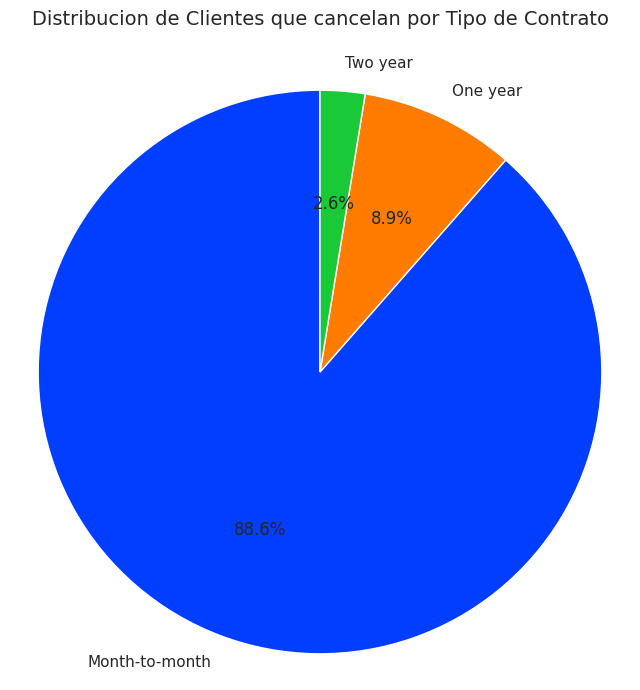

In [396]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


df_churn_yes = df[df['Churn'] == 'Yes'].copy()

churn_por_contrato_yes = df_churn_yes['account_Contract'].value_counts()

total_churn = churn_por_contrato_yes.sum()

churn_percentual_por_contrato = (churn_por_contrato_yes / total_churn) * 100

# Preparando los datos para el gráfico
sizes = churn_percentual_por_contrato.values
labels = churn_percentual_por_contrato.index
colors = sns.color_palette('bright')[0:len(labels)] # Colores

# Crea la figura y el eje para el gráfico
fig1, ax1 = plt.subplots(figsize=(8, 8))

# Gráfico
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)

# Establece el título del gráfico, ajustando la posición vertical con 'y'
ax1.set_title('Distribucion de Clientes que cancelan por Tipo de Contrato', fontsize=14, y=1.05) # Ajustado y para 1.05

# Asegura que el gráfico sea un círculo
ax1.axis('equal')


plt.show()

El gráfico sugiere una alta tasa de cancelación en contratos mes a mes.

## Bajas por Género

In [397]:
import pandas as pd

churn_por_genero = df.groupby(['customer_gender', 'Churn']).size().unstack(fill_value=0)


churn_por_genero_selecionado = churn_por_genero[['No', 'Yes']]

print(churn_por_genero_selecionado)

Churn              No  Yes
customer_gender           
Female           2549  939
Male             2625  930


### Gráfico de pizza - Bajas por género

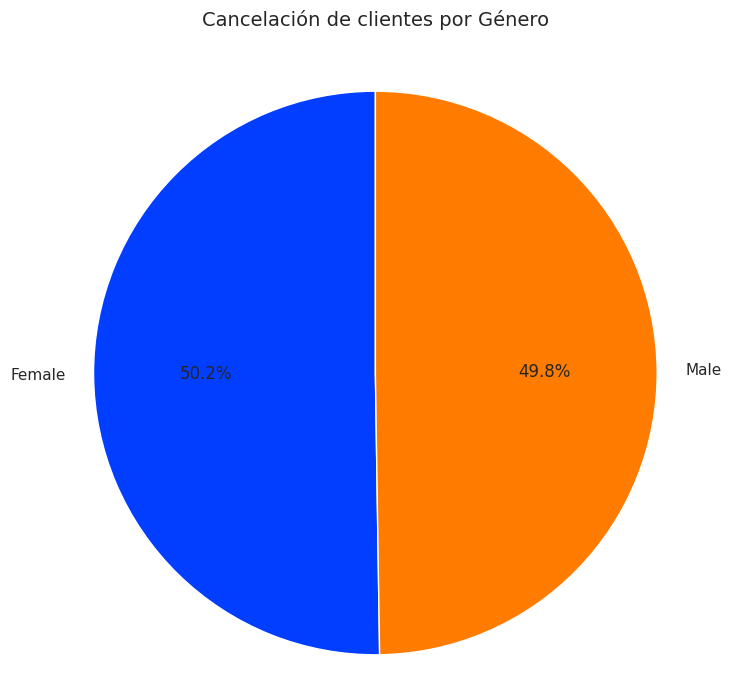

In [398]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")


df_churn_yes = df[df['Churn'] == 'Yes'].copy()


churn_por_genero_yes = df_churn_yes['customer_gender'].value_counts()

total_churn = churn_por_genero_yes.sum()


churn_porcentual_por_genero = (churn_por_genero_yes / total_churn) * 100

sizes = churn_porcentual_por_genero.values
labels = churn_porcentual_por_genero.index
colors = sns.color_palette('bright')[0:len(labels)]


fig1, ax1 = plt.subplots(figsize=(8, 8))


ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)


ax1.set_title('Cancelación de clientes por Género', fontsize=14, y=1.05)


ax1.axis('equal')


plt.show()


El resultado muestran ser muy parecidos en la cancelación por género

Cancelación por edad - Mayores de 65

In [399]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Importar numpy para usar np.nan de ser necesario

# Configura el estilo de Seaborn (opcional)
sns.set_theme(style="whitegrid")

# Suponga que df es su DataFrame
# Asegúrese de que el DataFrame 'df' ya se haya cargado y normalizado,
# como en su código inicial, y que la columna 'customer_SeniorCitizen' exista.

In [400]:
# Crea la columna 'Seniority_Group' asignando 0 y 1 a etiquetas descriptivas
df['Seniority_Group'] = df['customer_SeniorCitizen'].map({0: 'Otros_Usuarios', 1: '65+'})

# Limpia la columna 'Churn': Substituye valores vacios por NaN y borra lineas NaN
df['Churn'] = df['Churn'].replace('', np.nan)
df_limpo = df.dropna(subset=['Churn']).copy() # Usaremos este DataFrame limpio


In [401]:
# ==============================================================================
# Tabla comparativa (cantidad de bajas por grupo de antigüedad)
# ==============================================================================

print("Número de clientes que abandonaron el servicio por grupo de antigüedad:")

# Filtrar el DataFrame de LIMPIO para incluir solo clientes que abandonan ('Yes')
df_churn_yes_limpo = df_limpo[df_limpo['Churn'] == 'Yes'].copy()

# Cantidad de clientes que se dieron de baja en cada grupo por antigüedad.
churn_por_grupo_antiguedad_cant = df_churn_yes_limpo['Seniority_Group'].value_counts()

# Convierte la serie en un DataFrame para una visualización más clara
churn_por_grupo_antiguedad_df = churn_por_grupo_antiguedad_cant.reset_index()
churn_por_grupo_antiguedad_df.columns = ['Grupo_por_antigüedad', 'Número_Churn']

print(churn_por_grupo_antiguedad_df)

print("\n" + "="*60 + "\n") # Separador


Número de clientes que abandonaron el servicio por grupo de antigüedad:
  Grupo_por_antigüedad  Número_Churn
0       Otros_Usuarios          1393
1                  65+           476




In [402]:
import pandas as pd



df_65plus = df[df['Seniority_Group'] == '65+'].copy()


print("Valores únicos en la columna 'Churn' para clientes mayores de 65 años:")
print(df_65plus['Churn'].unique())
print("-" * 30)


df_otros = df[df['Seniority_Group'] == 'Otros_Usuarios'].copy()


print("Valores únicos en la columna 'Churn' para Otros Usuários:")
print(df_otros['Churn'].unique())


Valores únicos en la columna 'Churn' para clientes mayores de 65 años:
['Yes' 'No' nan]
------------------------------
Valores únicos en la columna 'Churn' para Otros Usuários:
['No' 'Yes' nan]


## Gráfico que muestra las bajas de mayores y menores de 65 años.

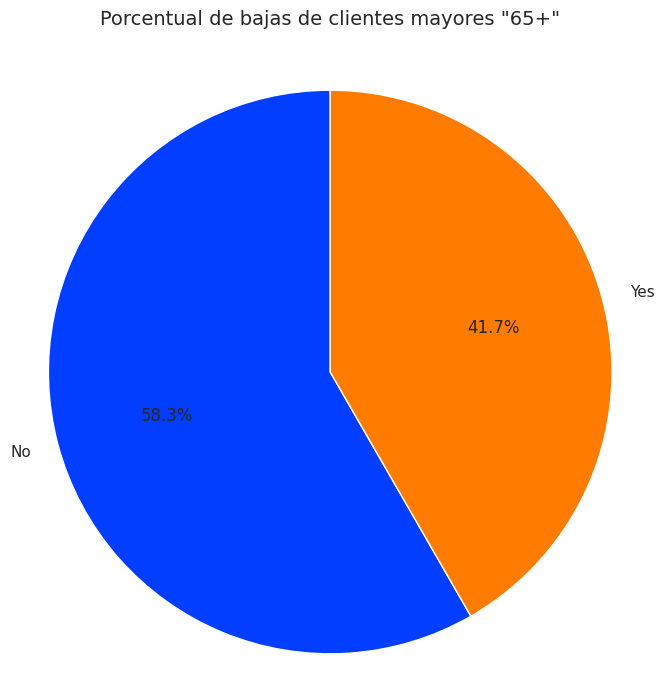

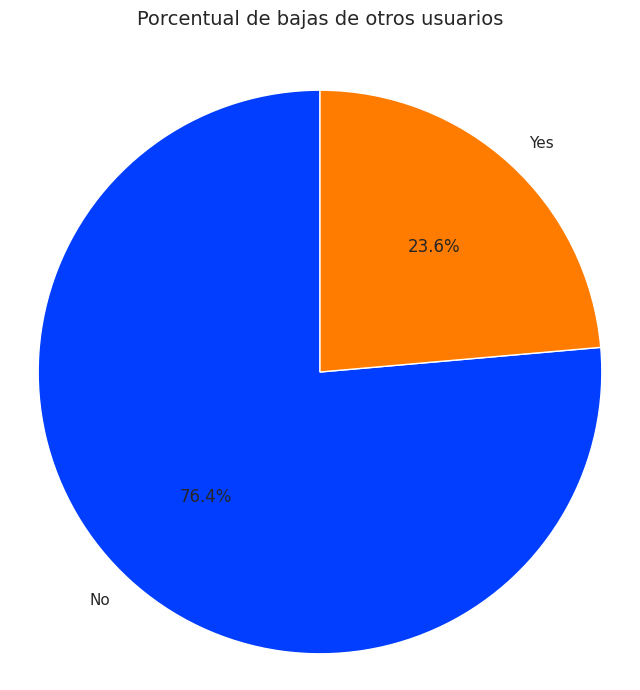

In [403]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set_theme(style="whitegrid")


df['Churn'] = df['Churn'].replace('', np.nan)


df_limpio = df.dropna(subset=['Churn']).copy()



#Gráfico para Clientes 65+ (usando df_limpio)


df_65plus_limpio = df_limpio[df_limpio['Seniority_Group'] == '65+'].copy()


churn_dist_65plus_limpio = df_65plus_limpio['Churn'].value_counts()


sizes_65plus = churn_dist_65plus_limpio.values
labels_65plus = churn_dist_65plus_limpio.index
colors_65plus = sns.color_palette('bright')[0:len(labels_65plus)]


fig1, ax1 = plt.subplots(figsize=(8, 8))


ax1.pie(sizes_65plus, labels=labels_65plus, colors=colors_65plus, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.set_title('Porcentual de bajas de clientes mayores "65+"', fontsize=14, y=1.05)
ax1.axis('equal')
plt.show()

#Gráfico para Clientes con menos de 65

df_otros_limpio = df_limpio[df_limpio['Seniority_Group'] == 'Otros_Usuarios'].copy()


churn_dist_otros_limpio = df_otros_limpio['Churn'].value_counts()


sizes_otros = churn_dist_otros_limpio.values
labels_otros = churn_dist_otros_limpio.index
colors_otros = sns.color_palette('bright')[0:len(labels_otros)]


fig2, ax2 = plt.subplots(figsize=(8, 8))


ax2.pie(sizes_otros, labels=labels_otros, colors=colors_otros, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax2.set_title('Porcentual de bajas de otros usuarios', fontsize=14, y=1.05)
ax2.axis('equal')
plt.show()


>El porcentaje de baja entre las personas mayores de 65 años o más, es significativamente mayor que el de los otros grupos de edad.

## Histograma de distribución del tiempo de contrato para clientes que cancelaron

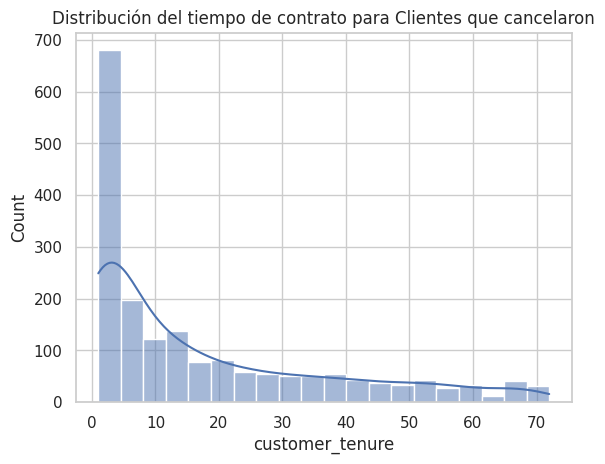

In [404]:
sns.histplot(df[df["Churn"] == "Yes"]["customer_tenure"], bins=20, kde=True)
plt.title("Distribución del tiempo de contrato para Clientes que cancelaron")
plt.show()

## Gráfico de dos líneas (histograma) del porcentaje de deserción por duración del contrato: 65+ vs. Menos de 65

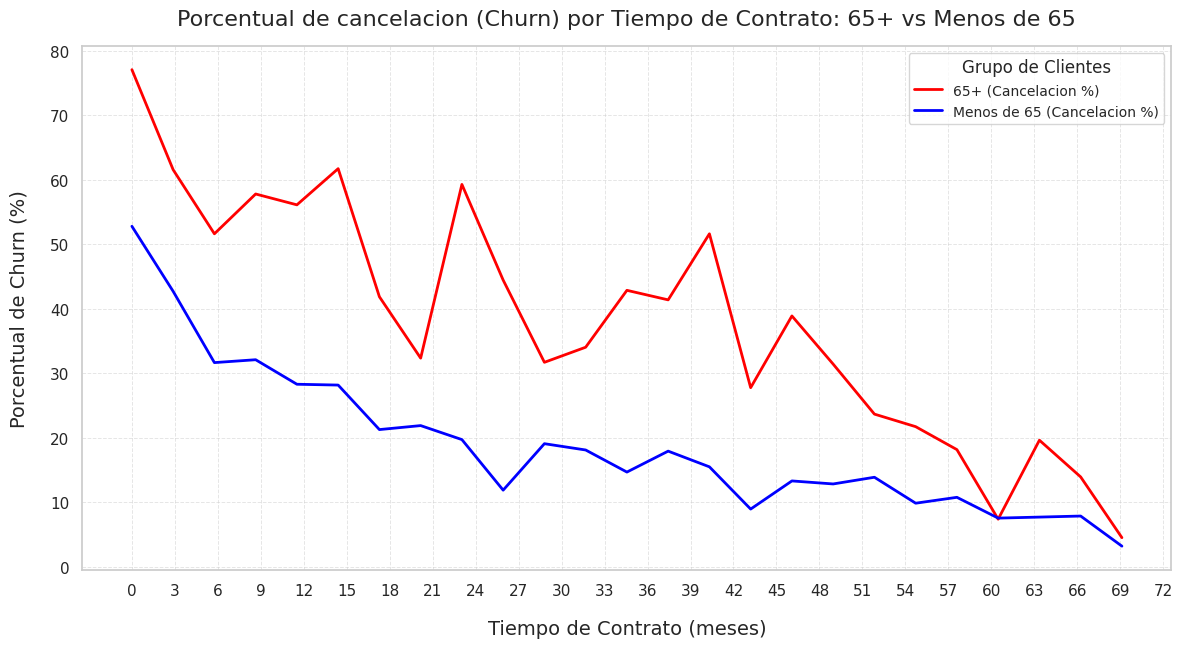

In [405]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))


max_tenure = df['customer_tenure'].max()
num_bins = int(max_tenure / 3) + 1 if max_tenure > 0 else 24


tenure_bins = np.histogram_bin_edges(df['customer_tenure'], bins=num_bins)


churn_65_plus, _ = np.histogram(df[(df["customer_SeniorCitizen"] == 1) & (df["Churn"] == "Yes")]["customer_tenure"], bins=tenure_bins)
churn_under_65, _ = np.histogram(df[(df["customer_SeniorCitizen"] == 0) & (df["Churn"] == "Yes")]["customer_tenure"], bins=tenure_bins)


total_65_plus, _ = np.histogram(df[df["customer_SeniorCitizen"] == 1]["customer_tenure"], bins=tenure_bins)
total_under_65, _ = np.histogram(df[df["customer_SeniorCitizen"] == 0]["customer_tenure"], bins=tenure_bins)


percent_churn_65_plus = (churn_65_plus / total_65_plus) * 100
percent_churn_65_plus[np.isnan(percent_churn_65_plus)] = 0

percent_churn_under_65 = (churn_under_65 / total_under_65) * 100
percent_churn_under_65[np.isnan(percent_churn_under_65)] = 0


sns.lineplot(x=tenure_bins[:-1], y=percent_churn_65_plus, color="red", label="65+ (Cancelacion %)", linewidth=2)
sns.lineplot(x=tenure_bins[:-1], y=percent_churn_under_65, color="blue", label="Menos de 65 (Cancelacion %)", linewidth=2)


plt.title("Porcentual de cancelacion (Churn) por Tiempo de Contrato: 65+ vs Menos de 65", fontsize=16, pad=15)
plt.xlabel("Tiempo de Contrato (meses)", fontsize=14, labelpad=15)
plt.ylabel("Porcentual de Churn (%)", fontsize=14, labelpad=15)


plt.legend(title="Grupo de Clientes", fontsize=10, title_fontsize=12)


plt.xticks(np.arange(0, max_tenure + 1, 3), rotation=0)
plt.grid(axis='x', which='major', linestyle='--', linewidth=0.7, alpha=0.5)
plt.grid(axis='y', which='major', linestyle='--', linewidth=0.7, alpha=0.5)


plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


## Gráfico de regresión: tendencias de deserción por antigüedad

/tmp/ipython-input-3598042799.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_bin_group = df_binned.groupby(['Tenure_Bin', 'customer_SeniorCitizen']).size().unstack(fill_value=0)
/tmp/ipython-input-3598042799.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_bin_group = df_binned[df_binned['Churn'] == 'Yes'].groupby(['Tenure_Bin', 'customer_SeniorCitizen']).size().unstack(fill_value=0)


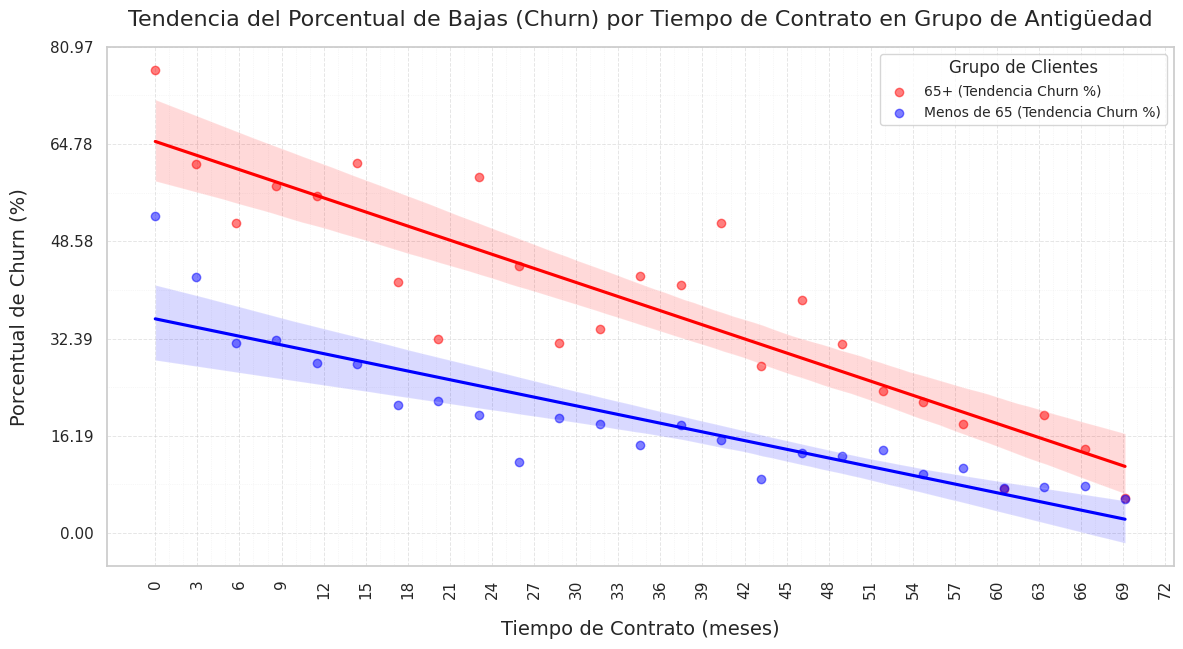

In [406]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


sns.set_theme(style="whitegrid")


plt.figure(figsize=(12, 7))

max_tenure = df['customer_tenure'].max()
num_bins = int(max_tenure / 3) + 1 if max_tenure > 0 else 24

tenure_bins = np.histogram_bin_edges(df['customer_tenure'], bins=num_bins)


df_binned = df.copy()
df_binned['Tenure_Bin'] = pd.cut(df_binned['customer_tenure'], bins=tenure_bins, labels=tenure_bins[:-1], include_lowest=True, right=False)

total_by_bin_group = df_binned.groupby(['Tenure_Bin', 'customer_SeniorCitizen']).size().unstack(fill_value=0)
churn_by_bin_group = df_binned[df_binned['Churn'] == 'Yes'].groupby(['Tenure_Bin', 'customer_SeniorCitizen']).size().unstack(fill_value=0)

percent_churn_by_bin_group = (churn_by_bin_group / total_by_bin_group) * 100
percent_churn_by_bin_group = percent_churn_by_bin_group.fillna(0)

percent_churn_reset = percent_churn_by_bin_group.reset_index()
percent_churn_reset.columns = ['Tenure_Bin', 'Churn_Percent_0', 'Churn_Percent_1']


sns.regplot(x=percent_churn_reset['Tenure_Bin'].astype(float),
            y=percent_churn_reset['Churn_Percent_1'],
            color="red",
            label="65+ (Tendencia Churn %)",
            ci=95,
            scatter_kws={'alpha':0.5})

sns.regplot(x=percent_churn_reset['Tenure_Bin'].astype(float),
            y=percent_churn_reset['Churn_Percent_0'],
            color="blue",
            label="Menos de 65 (Tendencia Churn %)",
            ci=95,
            scatter_kws={'alpha':0.5})

plt.title("Tendencia del Porcentual de Bajas (Churn) por Tiempo de Contrato en Grupo de Antigüedad", fontsize=16, pad=15)
plt.xlabel("Tiempo de Contrato (meses)", fontsize=14, labelpad=15)
plt.ylabel("Porcentual de Churn (%)", fontsize=14, labelpad=15)
plt.legend(title="Grupo de Clientes", fontsize=10, title_fontsize=12)


trimestre_ticks_major = np.arange(0, max_tenure + 1, 3)

plt.xticks(trimestre_ticks_major, rotation=90, ha='center')

plt.grid(axis='x', which='major', linestyle='--', linewidth=0.7, alpha=0.5)

mes_ticks_minor = np.arange(0, max_tenure + 1, 1)

mes_ticks_minor = mes_ticks_minor[~np.isin(mes_ticks_minor, trimestre_ticks_major)]

plt.xticks(mes_ticks_minor, labels=['']*len(mes_ticks_minor), minor=True)

plt.grid(axis='x', which='minor', linestyle=':', linewidth=0.5, alpha=0.3)


max_density = plt.gca().get_ylim()[1]

if max_density > 0:
    y_ticks_major = np.arange(0, max_density * 1.1, max_density / 5)
    y_ticks_minor = np.arange(0, max_density * 1.1, max_density / 10)

    plt.yticks(y_ticks_major)
    plt.grid(axis='y', which='major', linestyle='--', linewidth=0.7, alpha=0.5)

    plt.yticks(y_ticks_minor, minor=True)
    plt.grid(axis='y', which='minor', linestyle=':', linewidth=0.5, alpha=0.3)
else:
     plt.grid(axis='y', which='major', linestyle='--', linewidth=0.7, alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


>ESTE GRÁFICO DE REGRESIÓN MUESTRA QUE EL SEGMENTO DE MAYORES DE 65 AÑOS TIENE UNA MAYOR TENDENCIA A CANCELAR, ESPECIALMENTE ANTES DE LOS PERÍODOS CERCANOS AL VENCIMIENTO DEL CONTRATO (12, 24 Y 36 MESES). SUGIERO QUE, ADEMÁS DE INVERTIR MÁS EN EL GRUPO DE EDAD MENORES DE 65 AÑOS, SE REALICE UN TRABAJO DE MARKETING ESPECÍFICO PARA FIDELIZAR Y CONSERVAR LA FIDELIDAD DE LOS CLIENTES MAYORES DE 65 AÑOS ANTES DEL VENCIMIENTO DEL CONTRATO.

## Histograma Distribución del tiempo de contrato del cliente

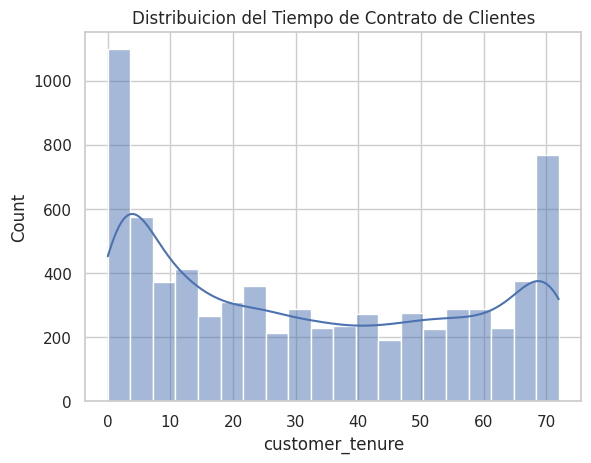

In [407]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["customer_tenure"], bins=20, kde=True)
plt.title("Distribuicion del Tiempo de Contrato de Clientes")
plt.show()


>El gráfico muestra tres patrones importantes. En primer lugar, se observa un alto volumen de cancelaciones durante los primeros meses, lo que indica que muchos clientes abandonan rápidamente, posiblemente debido a la falta de incentivos o a dificultades en la adaptación inicial. Tras este pico, las cancelaciones comienzan a disminuir y se mantienen estables, lo que sugiere que quienes superan esta etapa tienden a permanecer más tiempo. Finalmente, se observa un ligero aumento en la retención alrededor de los 70 meses, lo que podría indicar que los contratos más largos fomentan la retención o que los clientes fieles reciben beneficios por continuar.

¿Cómo utilizar esta información? Céntrese en los primeros meses: Ofrecer apoyo y beneficios a los nuevos clientes puede reducir las cancelaciones iniciales.

Fomente los contratos más largos: Explorar los beneficios para los clientes que se quedan durante períodos más largos puede aumentar la retención.

Comprender quiénes se quedan a largo plazo: Identificar el perfil de los clientes más fieles puede ayudar a replicar estrategias para otros grupos.

## Histograma doble de la distribución del tiempo y del contrato:

Clientes que Cancelaron vs. Todos los Clientes

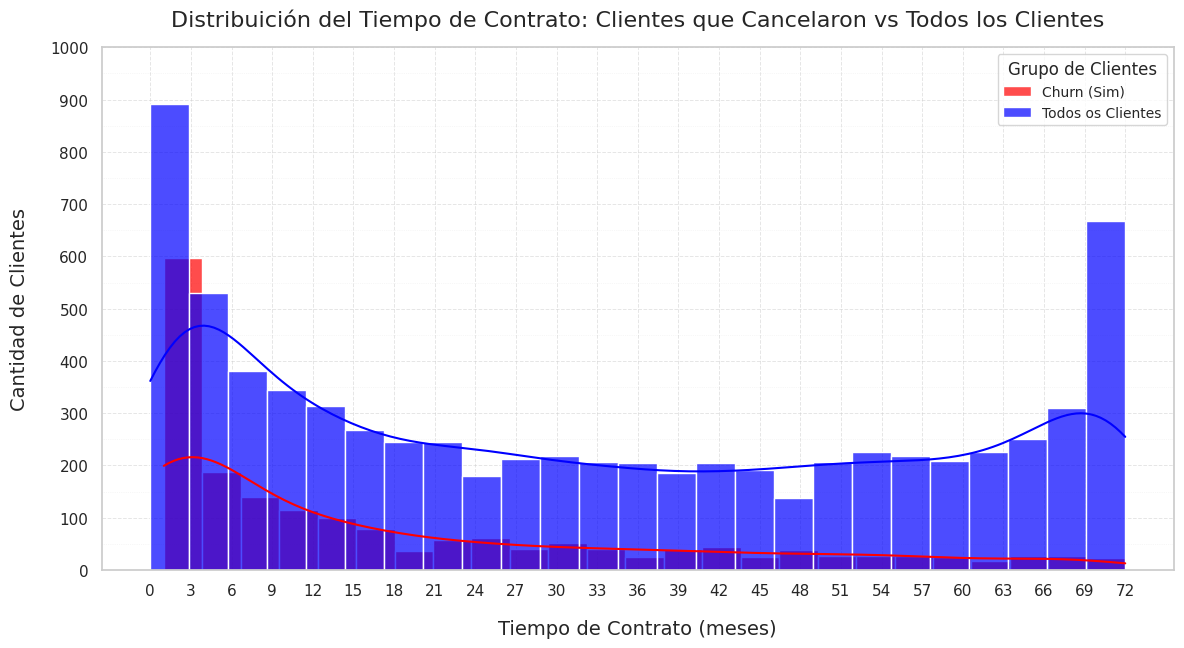

In [408]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))

max_tenure = df['customer_tenure'].max()
num_bins = int(max_tenure / 3) + 1 if max_tenure > 0 else 24

sns.histplot(
    data=df[df["Churn"] == "Yes"],
    x="customer_tenure",
    bins=num_bins,
    kde=True,
    color="red",
    label="Churn (Sim)",
    alpha=0.7
)

sns.histplot(
    data=df,
    x="customer_tenure",
    bins=num_bins,
    kde=True,
    color="blue",
    label="Todos os Clientes",
    alpha=0.7
)

plt.title("Distribuición del Tiempo de Contrato: Clientes que Cancelaron vs Todos los Clientes", fontsize=16, pad=15)
plt.xlabel("Tiempo de Contrato (meses)", fontsize=14, labelpad=15)
plt.ylabel("Cantidad de Clientes", fontsize=14, labelpad=15)

plt.legend(title="Grupo de Clientes", fontsize=10, title_fontsize=12)

trimestre_ticks_major = np.arange(0, max_tenure + 1, 3)
plt.xticks(trimestre_ticks_major, rotation=0)

plt.grid(axis='x', which='major', linestyle='--', linewidth=0.7, alpha=0.5)

max_count = plt.gca().get_ylim()[1]
y_ticks_major = np.arange(0, max_count + 101, 100)
plt.yticks(y_ticks_major)

plt.grid(axis='y', which='major', linestyle='--', linewidth=0.7, alpha=0.5)

y_ticks_minor = np.arange(0, max_count + 51, 50)
plt.yticks(y_ticks_minor, minor=True)

plt.grid(axis='y', which='minor', linestyle=':', linewidth=0.5, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


>Se puede decir que después de 18 meses hay estabilidad en los contratos, lo que sugiere que se debe invertir en la retención inicial.

## Gráfico de barras para comparar cancelaciones entre tipos de contrato

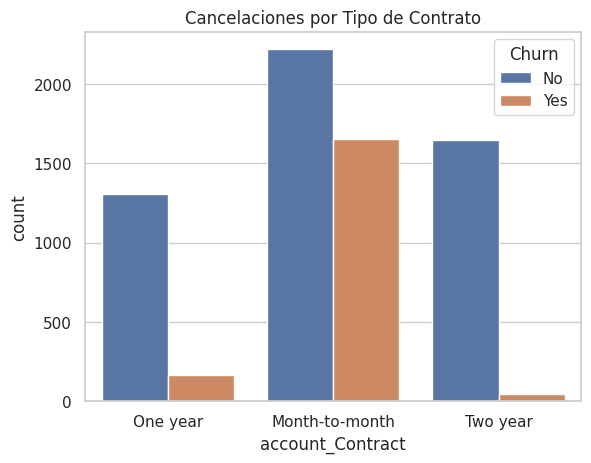

In [409]:
sns.countplot(x=df["account_Contract"], hue=df["Churn"])
plt.title("Cancelaciones por Tipo de Contrato")
plt.show()


>Es obvio que los contratos mensuales tienen la menor retención.

## Gráficos de barras para analizar diversos aspectos

Cuartiles de tenencia (meses):
  Q1 (25%): 9.00
  Mediana (50%): 29.00
  Q3 (75%): 55.00
------------------------------
Analizando la distribución de las siguientes características en Clientes de nivel bajo vs. Alto Tenure:
['customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod']

Analizando característica: 'customer_gender'
Tabla de Cantidad:
customer_gender  Female  Male
Tenure_Group                 
Alto (> Q3)         880   933
Bajo (<= Q1)        951   976
Medio              1761  1766

Tabla Porcentual (Porcentual DENTRO de cada Grupo de Tenure):
customer_gender  Female   Male
Tenure_Group                  
Alto (> Q3)       48.54  51.46
Bajo (<= Q1) 

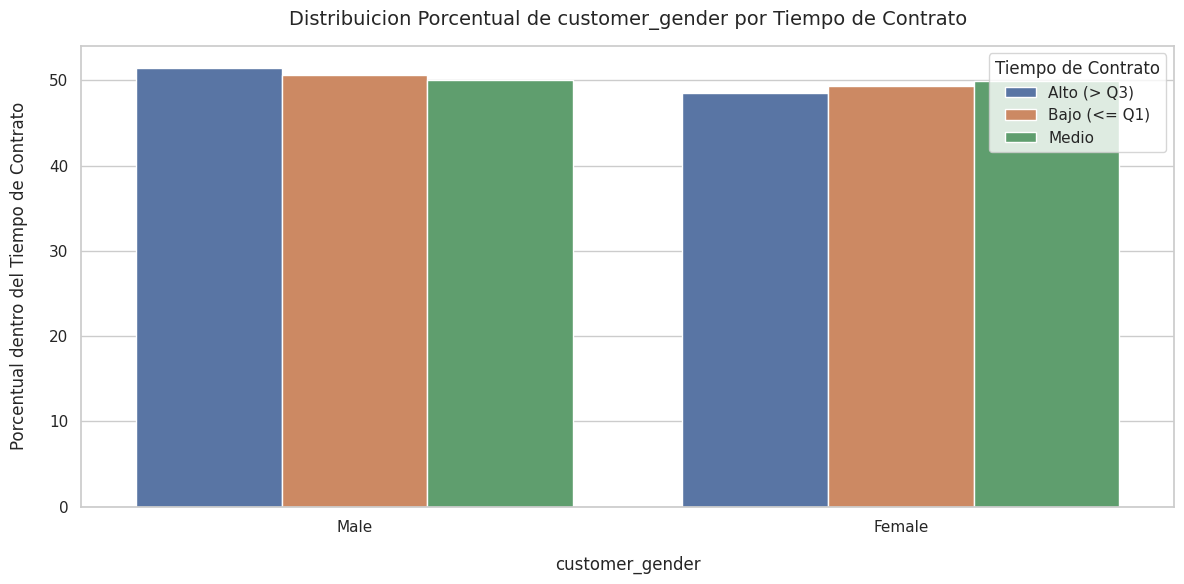



Analizando característica: 'customer_SeniorCitizen'
Tabla de Cantidad:
customer_SeniorCitizen     0    1
Tenure_Group                     
Alto (> Q3)             1512  301
Bajo (<= Q1)            1636  291
Medio                   2937  590

Tabla Porcentual (Porcentual DENTRO de cada Grupo de Tenure):
customer_SeniorCitizen      0      1
Tenure_Group                        
Alto (> Q3)             83.40  16.60
Bajo (<= Q1)            84.90  15.10
Medio                   83.27  16.73


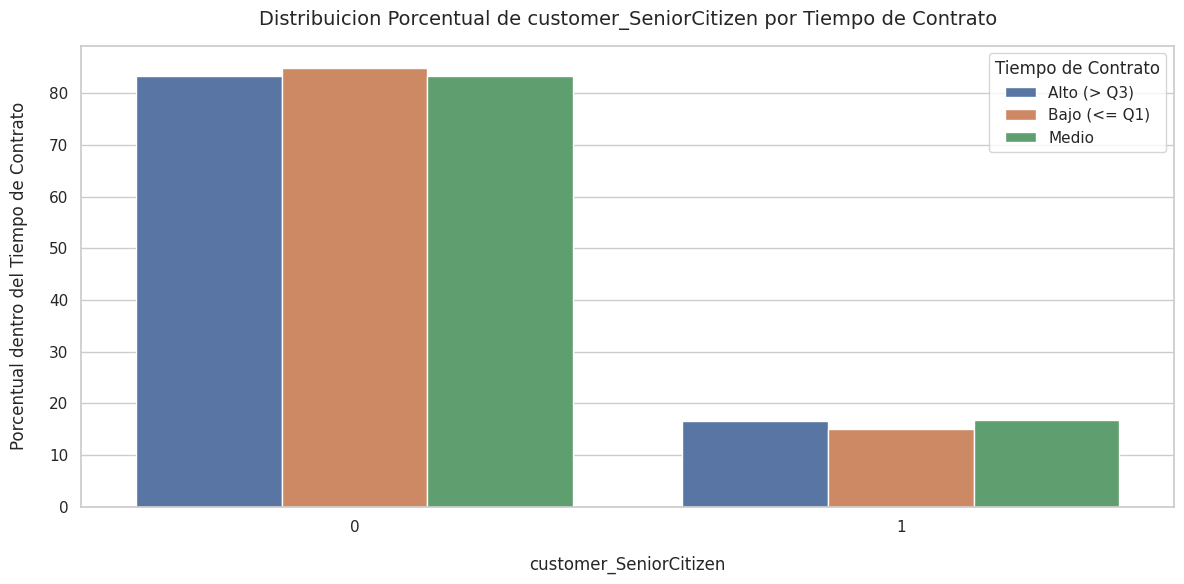



Analizando característica: 'customer_Partner'
Tabla de Cantidad:
customer_Partner    No   Yes
Tenure_Group                
Alto (> Q3)        468  1345
Bajo (<= Q1)      1452   475
Medio             1829  1698

Tabla Porcentual (Porcentual DENTRO de cada Grupo de Tenure):
customer_Partner     No    Yes
Tenure_Group                  
Alto (> Q3)       25.81  74.19
Bajo (<= Q1)      75.35  24.65
Medio             51.86  48.14


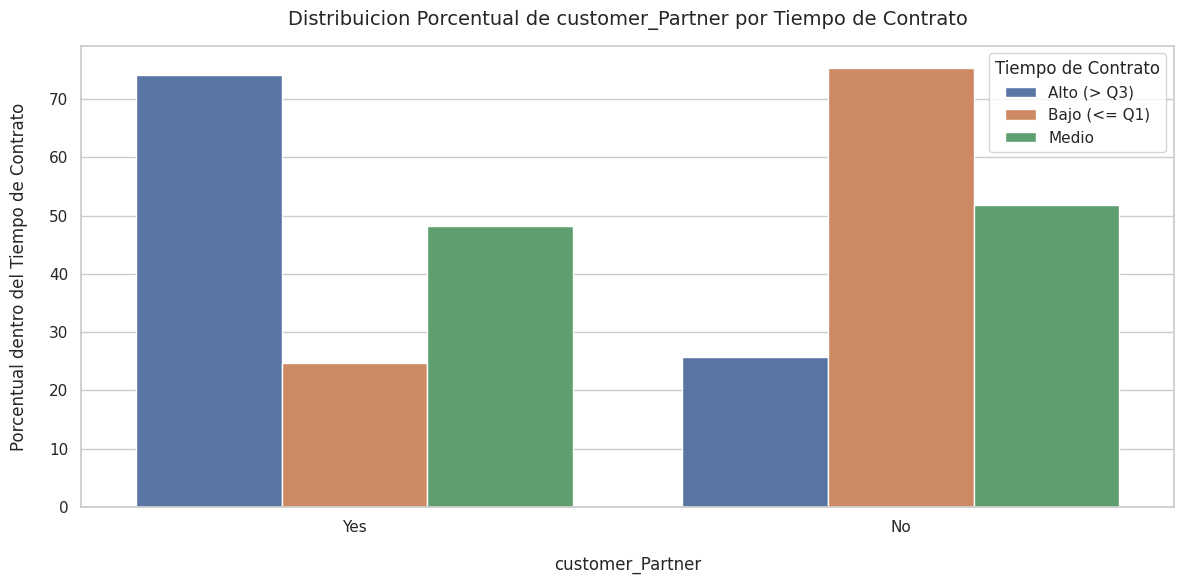



Analizando característica: 'customer_Dependents'
Tabla de Cantidad:
customer_Dependents    No   Yes
Tenure_Group                   
Alto (> Q3)          1105   708
Bajo (<= Q1)         1552   375
Medio                2429  1098

Tabla Porcentual (Porcentual DENTRO de cada Grupo de Tenure):
customer_Dependents     No    Yes
Tenure_Group                     
Alto (> Q3)          60.95  39.05
Bajo (<= Q1)         80.54  19.46
Medio                68.87  31.13


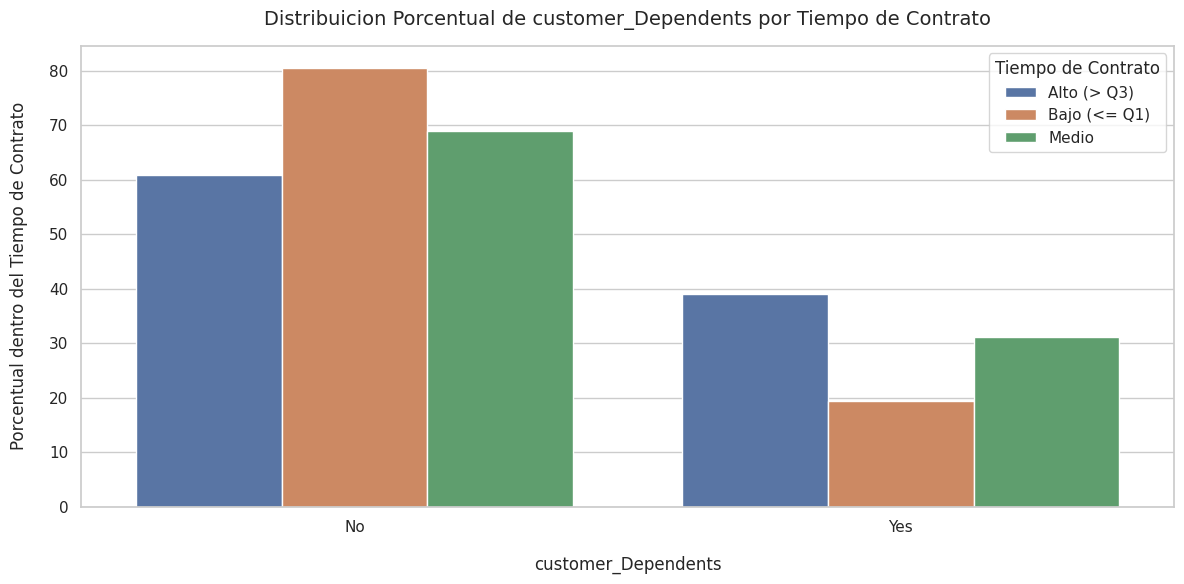



Analizando característica: 'phone_PhoneService'
Tabla de Cantidad:
phone_PhoneService   No   Yes
Tenure_Group                 
Alto (> Q3)         159  1654
Bajo (<= Q1)        194  1733
Medio               354  3173

Tabla Porcentual (Porcentual DENTRO de cada Grupo de Tenure):
phone_PhoneService     No    Yes
Tenure_Group                    
Alto (> Q3)          8.77  91.23
Bajo (<= Q1)        10.07  89.93
Medio               10.04  89.96


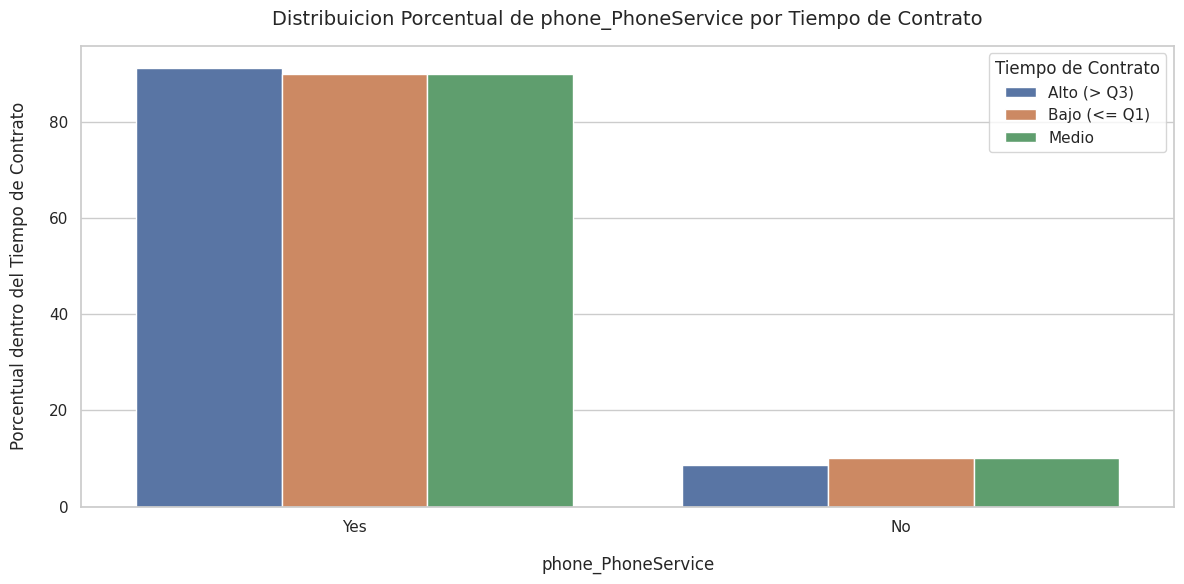



Analizando característica: 'phone_MultipleLines'
Tabla de Cantidad:
phone_MultipleLines    No  No phone service   Yes
Tenure_Group                                     
Alto (> Q3)           475               159  1179
Bajo (<= Q1)         1328               194   405
Medio                1692               354  1481

Tabla Porcentual (Porcentual DENTRO de cada Grupo de Tenure):
phone_MultipleLines     No  No phone service    Yes
Tenure_Group                                       
Alto (> Q3)          26.20              8.77  65.03
Bajo (<= Q1)         68.92             10.07  21.02
Medio                47.97             10.04  41.99


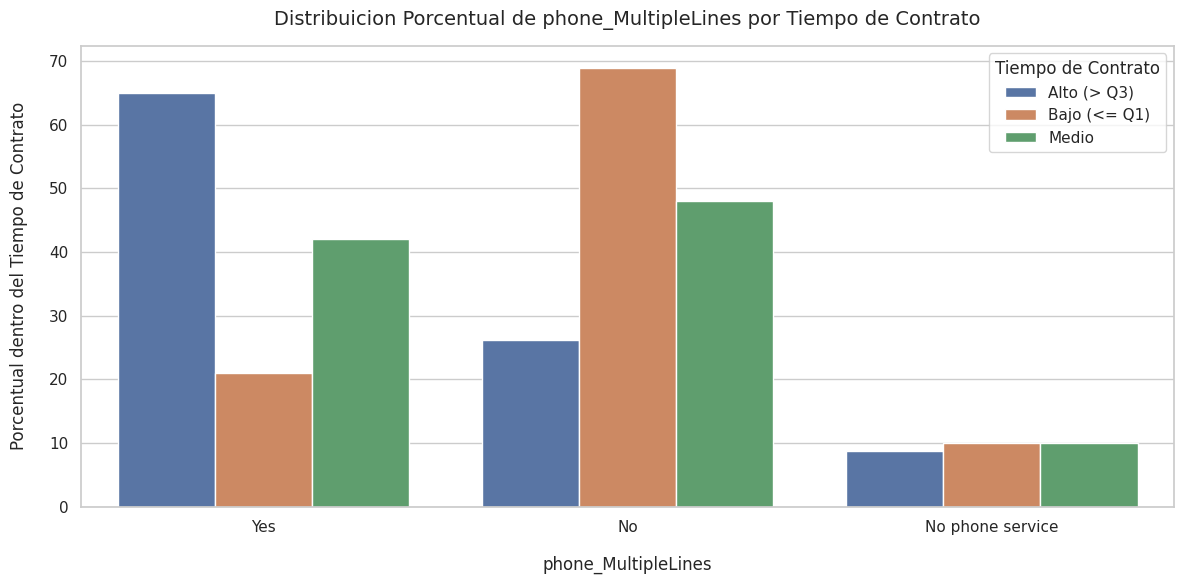



Analizando característica: 'internet_InternetService'
Tabla de Cantidad:
internet_InternetService   DSL  Fiber optic   No
Tenure_Group                                    
Alto (> Q3)                638          819  356
Bajo (<= Q1)               665          817  445
Medio                     1185         1562  780

Tabla Porcentual (Porcentual DENTRO de cada Grupo de Tenure):
internet_InternetService    DSL  Fiber optic     No
Tenure_Group                                       
Alto (> Q3)               35.19        45.17  19.64
Bajo (<= Q1)              34.51        42.40  23.09
Medio                     33.60        44.29  22.12


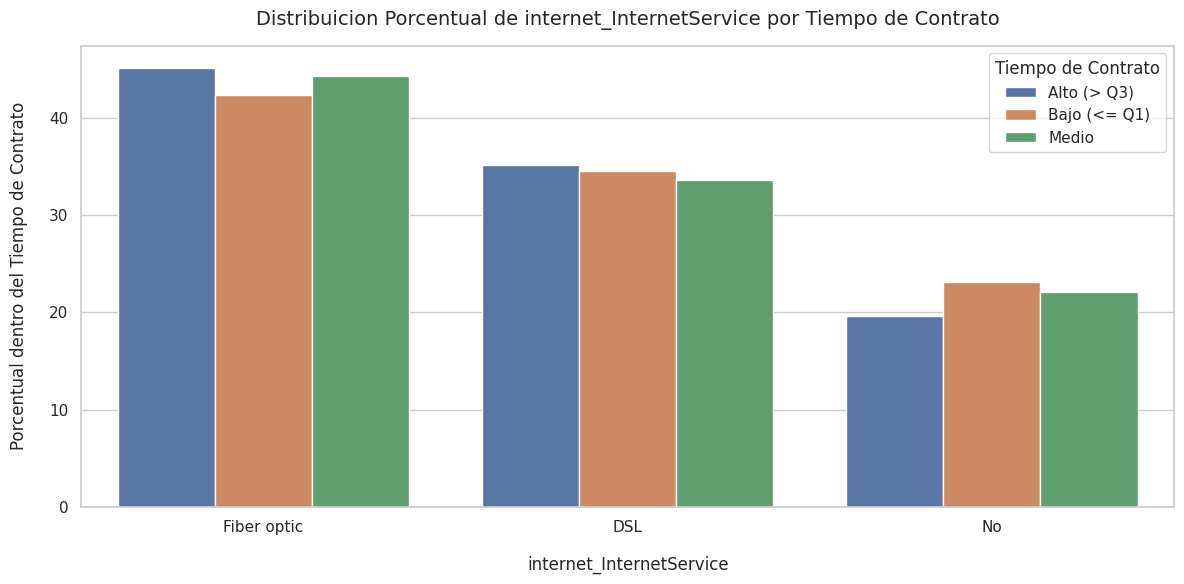



Analizando característica: 'internet_OnlineSecurity'
Tabla de Cantidad:
internet_OnlineSecurity    No  No internet service  Yes
Tenure_Group                                           
Alto (> Q3)               558                  356  899
Bajo (<= Q1)             1258                  445  224
Medio                    1792                  780  955

Tabla Porcentual (Porcentual DENTRO de cada Grupo de Tenure):
internet_OnlineSecurity     No  No internet service    Yes
Tenure_Group                                              
Alto (> Q3)              30.78                19.64  49.59
Bajo (<= Q1)             65.28                23.09  11.62
Medio                    50.81                22.12  27.08


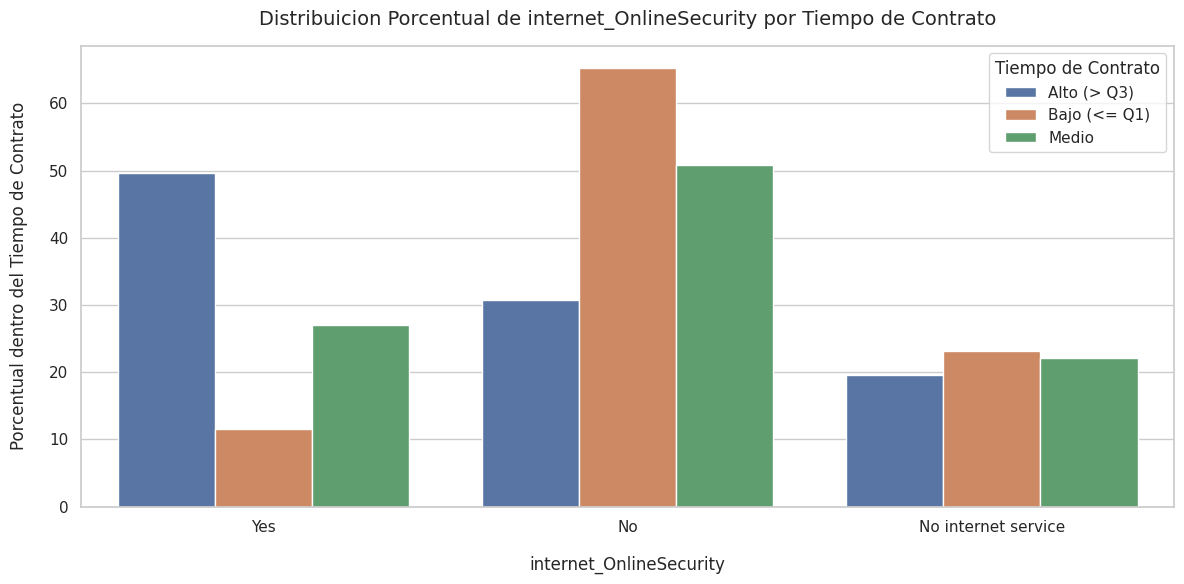



Analizando característica: 'internet_OnlineBackup'
Tabla de Cantidad:
internet_OnlineBackup    No  No internet service   Yes
Tenure_Group                                          
Alto (> Q3)             392                  356  1065
Bajo (<= Q1)           1198                  445   284
Medio                  1592                  780  1155

Tabla Porcentual (Porcentual DENTRO de cada Grupo de Tenure):
internet_OnlineBackup     No  No internet service    Yes
Tenure_Group                                            
Alto (> Q3)            21.62                19.64  58.74
Bajo (<= Q1)           62.17                23.09  14.74
Medio                  45.14                22.12  32.75


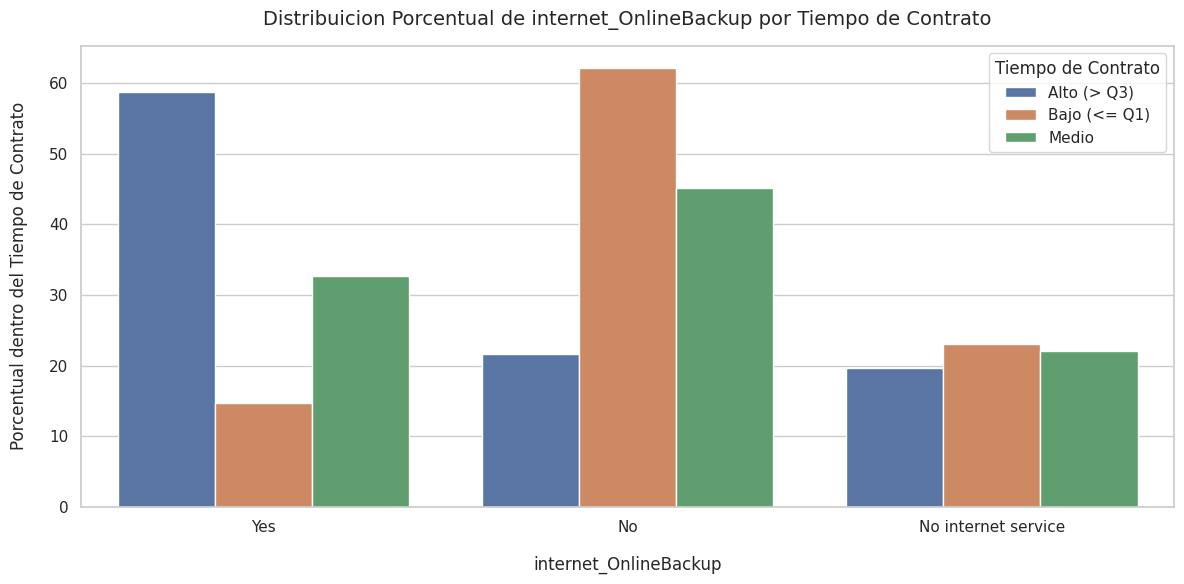



Analizando característica: 'internet_DeviceProtection'
Tabla de Cantidad:
internet_DeviceProtection    No  No internet service   Yes
Tenure_Group                                              
Alto (> Q3)                 403                  356  1054
Bajo (<= Q1)               1217                  445   265
Medio                      1575                  780  1172

Tabla Porcentual (Porcentual DENTRO de cada Grupo de Tenure):
internet_DeviceProtection     No  No internet service    Yes
Tenure_Group                                                
Alto (> Q3)                22.23                19.64  58.14
Bajo (<= Q1)               63.16                23.09  13.75
Medio                      44.66                22.12  33.23


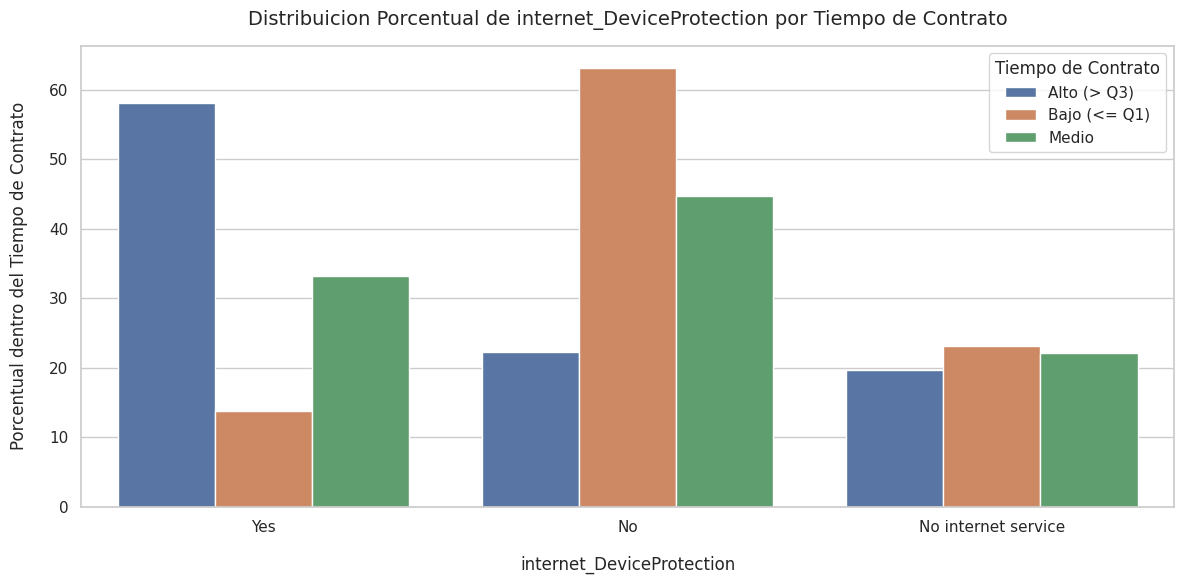



Analizando característica: 'internet_TechSupport'
Tabla de Cantidad:
internet_TechSupport    No  No internet service  Yes
Tenure_Group                                        
Alto (> Q3)            554                  356  903
Bajo (<= Q1)          1255                  445  227
Medio                 1773                  780  974

Tabla Porcentual (Porcentual DENTRO de cada Grupo de Tenure):
internet_TechSupport     No  No internet service    Yes
Tenure_Group                                           
Alto (> Q3)           30.56                19.64  49.81
Bajo (<= Q1)          65.13                23.09  11.78
Medio                 50.27                22.12  27.62


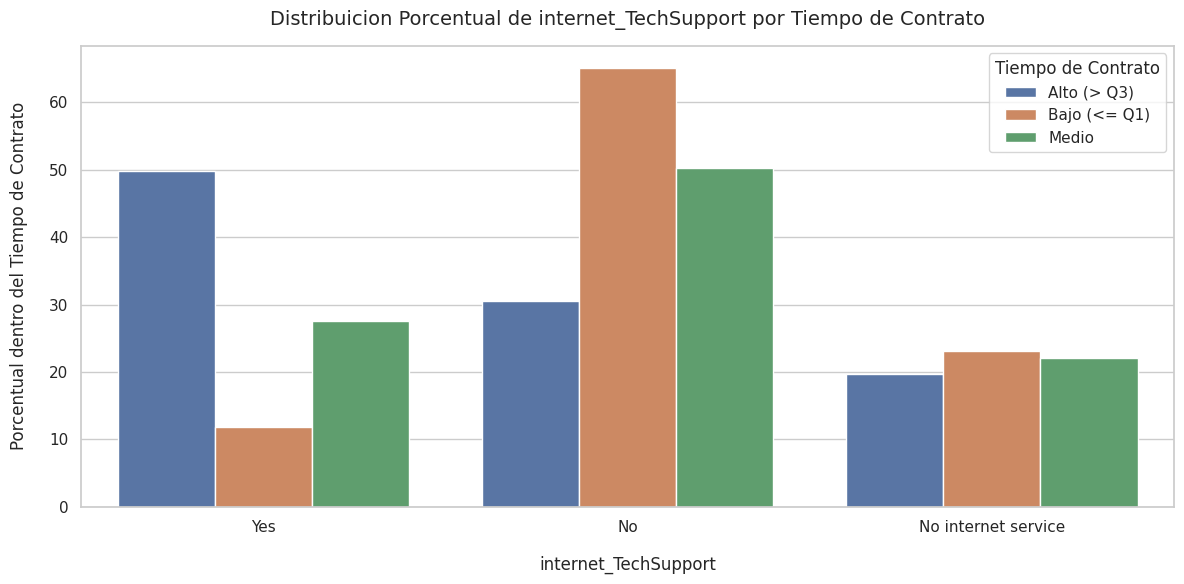



Analizando característica: 'internet_StreamingTV'
Tabla de Cantidad:
internet_StreamingTV    No  No internet service   Yes
Tenure_Group                                         
Alto (> Q3)            427                  356  1030
Bajo (<= Q1)          1069                  445   413
Medio                 1400                  780  1347

Tabla Porcentual (Porcentual DENTRO de cada Grupo de Tenure):
internet_StreamingTV     No  No internet service    Yes
Tenure_Group                                           
Alto (> Q3)           23.55                19.64  56.81
Bajo (<= Q1)          55.47                23.09  21.43
Medio                 39.69                22.12  38.19


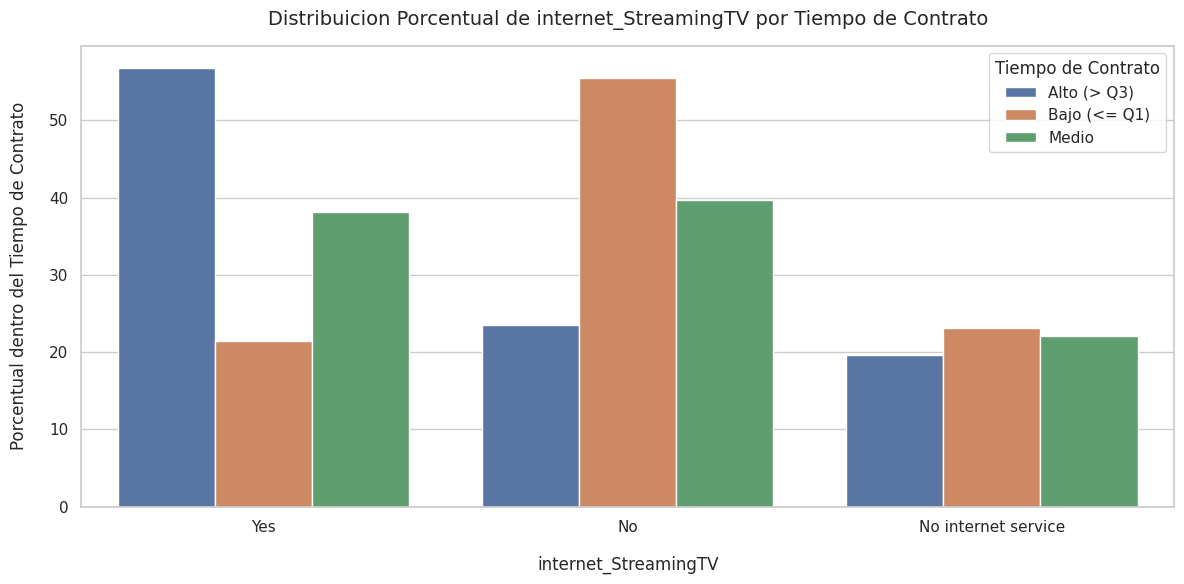



Analizando característica: 'internet_StreamingMovies'
Tabla de Cantidad:
internet_StreamingMovies    No  No internet service   Yes
Tenure_Group                                             
Alto (> Q3)                413                  356  1044
Bajo (<= Q1)              1074                  445   408
Medio                     1383                  780  1364

Tabla Porcentual (Porcentual DENTRO de cada Grupo de Tenure):
internet_StreamingMovies     No  No internet service    Yes
Tenure_Group                                               
Alto (> Q3)               22.78                19.64  57.58
Bajo (<= Q1)              55.73                23.09  21.17
Medio                     39.21                22.12  38.67


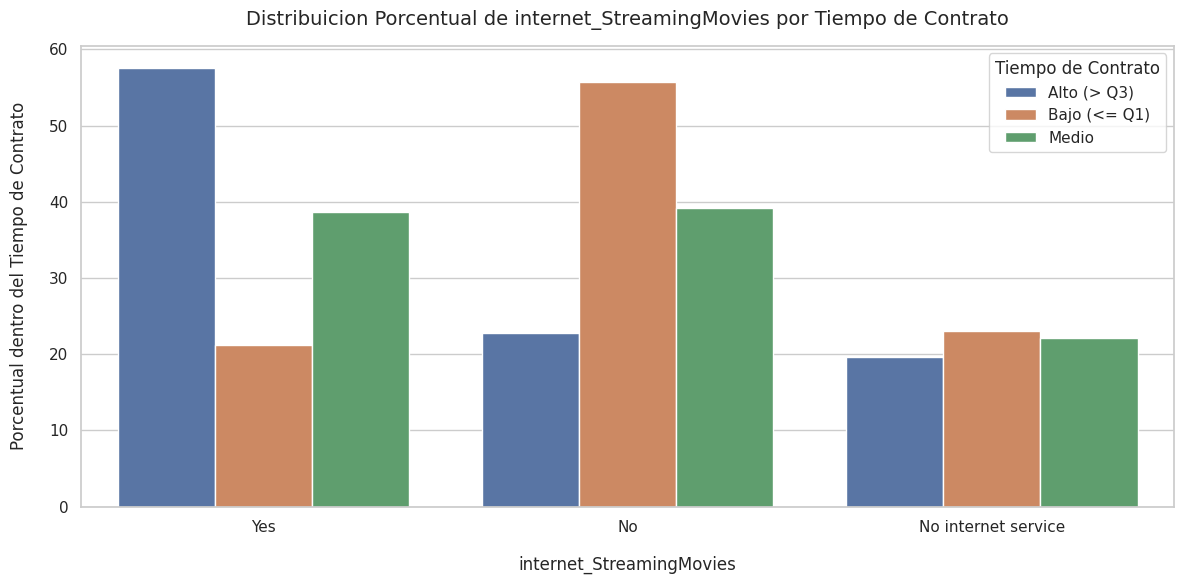



Analizando característica: 'account_Contract'
Tabla de Cantidad:
account_Contract  Month-to-month  One year  Two year
Tenure_Group                                        
Alto (> Q3)                  203       454      1156
Bajo (<= Q1)                1801        76        50
Medio                       2001       989       537

Tabla Porcentual (Porcentual DENTRO de cada Grupo de Tenure):
account_Contract  Month-to-month  One year  Two year
Tenure_Group                                        
Alto (> Q3)                11.20     25.04     63.76
Bajo (<= Q1)               93.46      3.94      2.59
Medio                      56.73     28.04     15.23


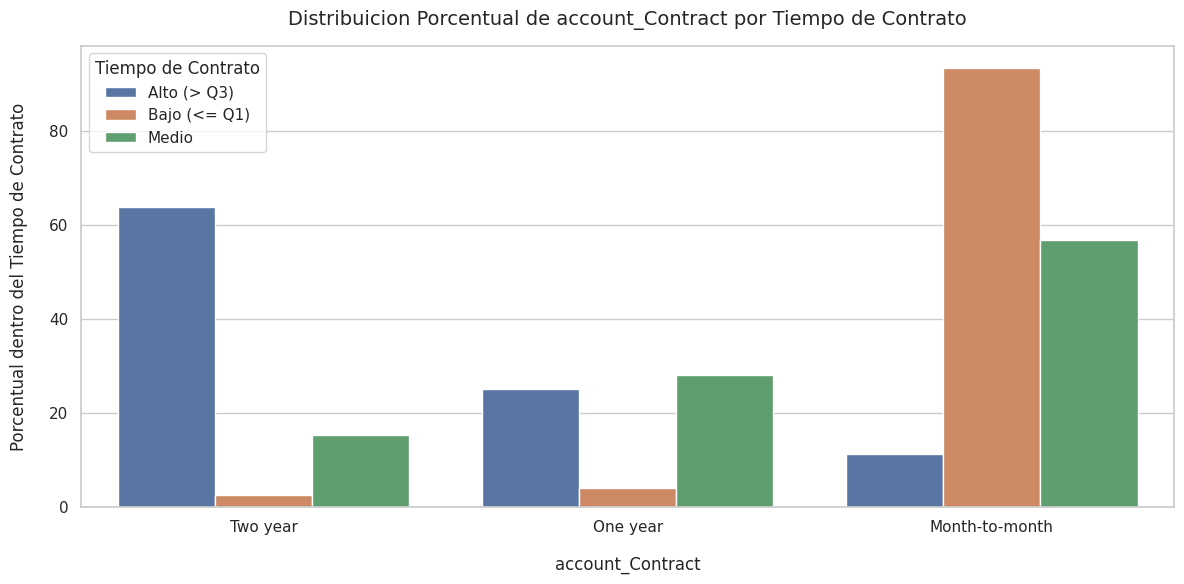



Analizando característica: 'account_PaperlessBilling'
Tabla de Cantidad:
account_PaperlessBilling    No   Yes
Tenure_Group                        
Alto (> Q3)                718  1095
Bajo (<= Q1)               804  1123
Medio                     1434  2093

Tabla Porcentual (Porcentual DENTRO de cada Grupo de Tenure):
account_PaperlessBilling     No    Yes
Tenure_Group                          
Alto (> Q3)               39.60  60.40
Bajo (<= Q1)              41.72  58.28
Medio                     40.66  59.34


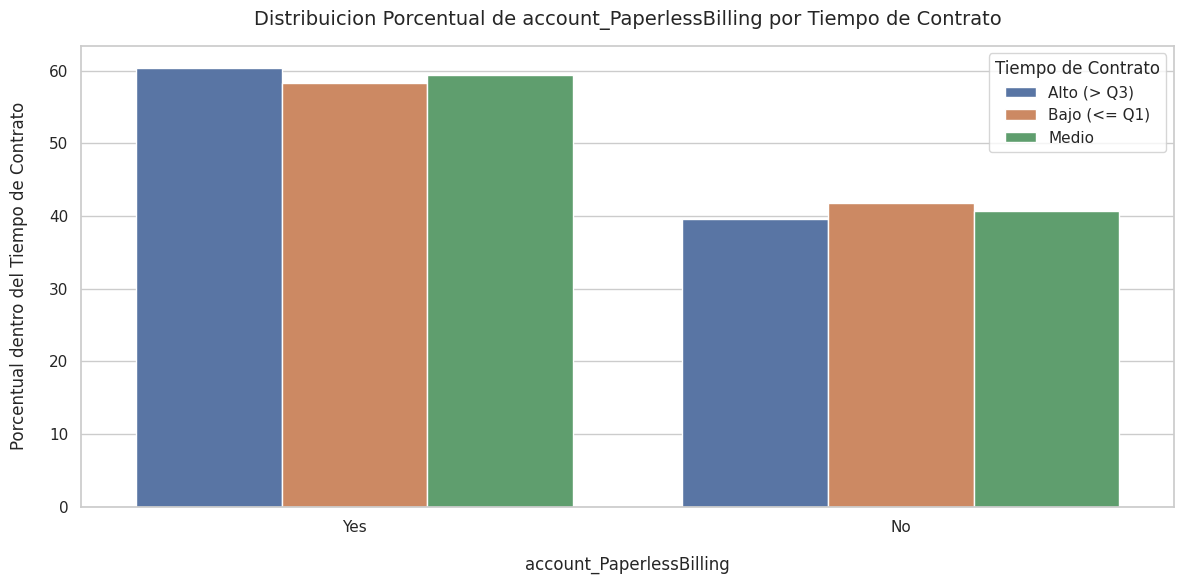



Analizando característica: 'account_PaymentMethod'
Tabla de Cantidad:
account_PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Tenure_Group                                                                
Alto (> Q3)                                  634                      630   
Bajo (<= Q1)                                 178                      181   
Medio                                        777                      757   

account_PaymentMethod  Electronic check  Mailed check  
Tenure_Group                                           
Alto (> Q3)                         363           186  
Bajo (<= Q1)                        874           694  
Medio                              1208           785  

Tabla Porcentual (Porcentual DENTRO de cada Grupo de Tenure):
account_PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Tenure_Group                                                                
Alto (> Q3)                                34

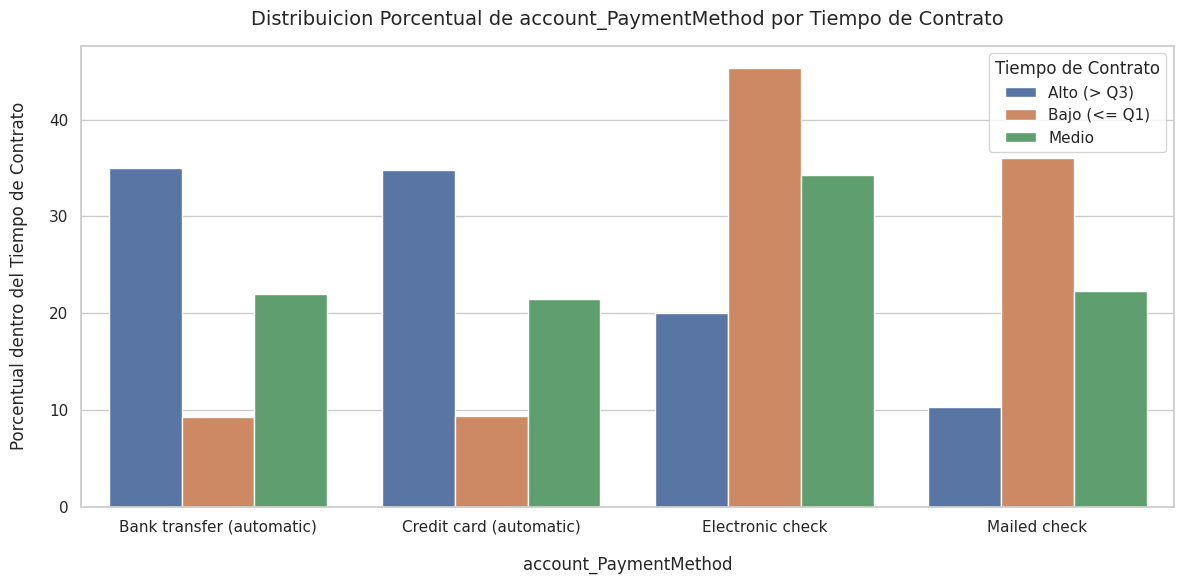

In [410]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df['customer_tenure'] = pd.to_numeric(df['customer_tenure'], errors='coerce')
df.dropna(subset=['customer_tenure'], inplace=True) # Eliminar líneas donde tenure no es válido


quartiles = df['customer_tenure'].quantile([0.25, 0.5, 0.75])
q1 = quartiles[0.25]
median = quartiles[0.5]
q3 = quartiles[0.75]

print(f"Cuartiles de tenencia (meses):")
print(f"  Q1 (25%): {q1:.2f}")
print(f"  Mediana (50%): {median:.2f}")
print(f"  Q3 (75%): {q3:.2f}")
print("-" * 30)

# Crear grupos de tenure
df['Tenure_Group'] = 'Medio'
df.loc[df['customer_tenure'] <= q1, 'Tenure_Group'] = 'Bajo (<= Q1)'
df.loc[df['customer_tenure'] > q3, 'Tenure_Group'] = 'Alto (> Q3)'


colum_analize = [
    'customer_gender',
    'customer_SeniorCitizen',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV' ,
    'internet_StreamingMovies' ,
    'account_Contract',
    'account_PaperlessBilling',
    'account_PaymentMethod',

]

print("Analizando la distribución de las siguientes características en Clientes de nivel bajo vs. Alto Tenure:")
print(colum_analize)
print("="*60)



for col in colum_analize:
    print(f"\nAnalizando característica: '{col}'")


    contingency_table = pd.crosstab(df['Tenure_Group'], df[col])
    print("Tabla de Cantidad:")
    print(contingency_table)


    contingency_percent = contingency_table.apply(lambda x: x/x.sum(), axis=1) * 100
    print("\nTabla Porcentual (Porcentual DENTRO de cada Grupo de Tenure):")
    print(contingency_percent.round(2))



    plot_data_count = df.groupby('Tenure_Group')[col].value_counts(normalize=False).rename('count').reset_index()

    plot_data_percent = df.groupby('Tenure_Group')[col].value_counts(normalize=True).rename('porcentaje').reset_index()
    plot_data_percent['porcentaje'] = plot_data_percent['porcentaje'] * 100

    plt.figure(figsize=(12, 6))

    sns.barplot(data=plot_data_percent, x=col, y='porcentaje', hue='Tenure_Group')
    plt.title(f'Distribuicion Porcentual de {col} por Tiempo de Contrato', fontsize=14, pad=15)
    plt.xlabel(col, fontsize=12, labelpad=15)
    plt.ylabel('Porcentual dentro del Tiempo de Contrato', labelpad=15, fontsize=12)
    plt.xticks(rotation=0, ha='center')
    plt.legend(title='Tiempo de Contrato')
    plt.tight_layout()
    plt.show()

    print("\n" + "="*60)


## Gráfico de barras con el recuento de clientes por Seguridad Online y Cancelados

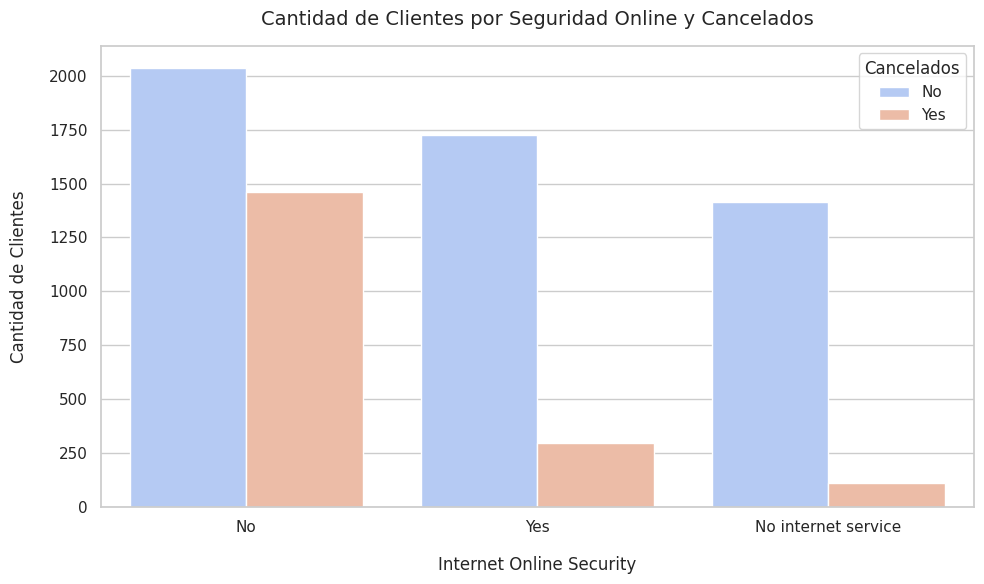

In [411]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='internet_OnlineSecurity', hue='Churn', palette='coolwarm')

plt.title('Cantidad de Clientes por Seguridad Online y Cancelados',pad=15, fontsize=14)
plt.xlabel('Internet Online Security', labelpad=15, fontsize=12)
plt.ylabel('Cantidad de Clientes', labelpad=15,fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(title='Cancelados', loc='upper right')

plt.tight_layout()
plt.show()


>Los clientes que se sienten seguros en línea tienden a permanecer más tiempo. La falta de seguridad en línea puede estar relacionada con una mayor tasa de abandono.

## Gráfico de dispersión que muestra la relación entre el tiempo del contrato y las facturas mensuales frente a las cancelaciones.

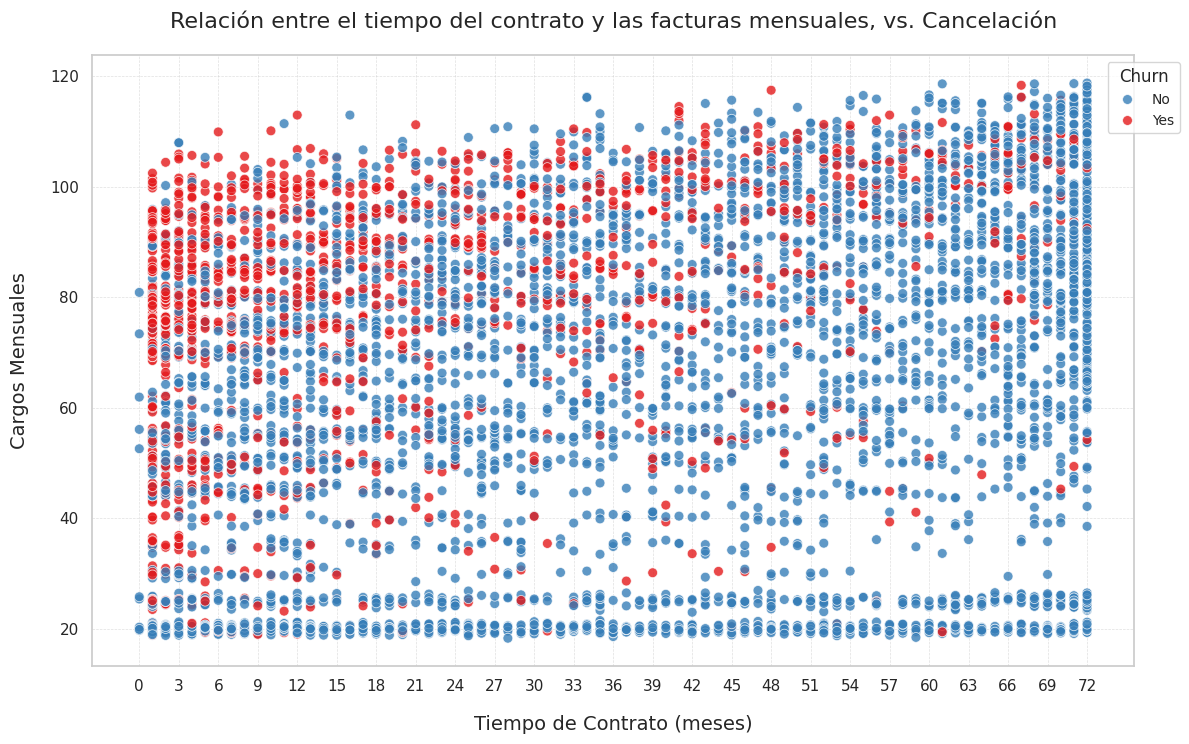

In [412]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


custom_palette = {'Yes': '#E41A1C', 'No': '#377EB8'}

plt.figure(figsize=(12, 8))

sns.scatterplot(data=df, x='customer_tenure', y='account_Charges_Monthly', hue='Churn', alpha=0.8,  palette=custom_palette, s=50)



plt.title('Relación entre el tiempo del contrato y las facturas mensuales, vs. Cancelación', fontsize=16, pad=20)
plt.xlabel('Tiempo de Contrato (meses)', fontsize=14, labelpad=15)
plt.ylabel('Cargos Mensuales', fontsize=14, labelpad=15)
plt.legend(title='Churn', title_fontsize='12', fontsize='10', loc='upper right', bbox_to_anchor=(1.05, 1))


max_tenure = df['customer_tenure'].max()
trimestre_ticks = np.arange(0, max_tenure + 1, 3)
plt.xticks(trimestre_ticks, rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)


plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


>Los clientes con cargos mensuales altos tienen mayor probabilidad de abandonar el servicio. A partir del mes 18, las tasas de abandono comienzan a disminuir en los tramos de gasto superiores a $80. Se recomienda que los servicios clave para los usuarios con mayor tasa de abandono no superen esta cantidad. De ser así, se les debería ofrecer una compensación o descuentos.

## Gráficos de barras: Cancelaciones vs. Tipos de servicio

Análisis de Churn por Servicio:

Analizando el servicio: 'phone_PhoneService'
Tabla de Cantidades:
Churn                 No   Yes
phone_PhoneService            
No                   512   170
Yes                 4662  1699

Porcentual de Churn (%):
Churn                  No    Yes
phone_PhoneService              
No                  75.07  24.93
Yes                 73.29  26.71


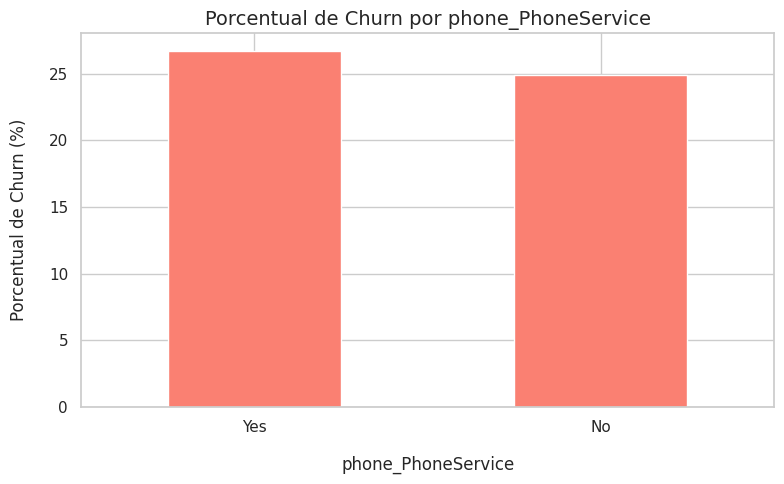

----------------------------------------

Analizando el servicio: 'phone_MultipleLines'
Tabla de Cantidades:
Churn                  No  Yes
phone_MultipleLines           
No                   2541  849
No phone service      512  170
Yes                  2121  850

Porcentual de Churn (%):
Churn                   No    Yes
phone_MultipleLines              
No                   74.96  25.04
No phone service     75.07  24.93
Yes                  71.39  28.61


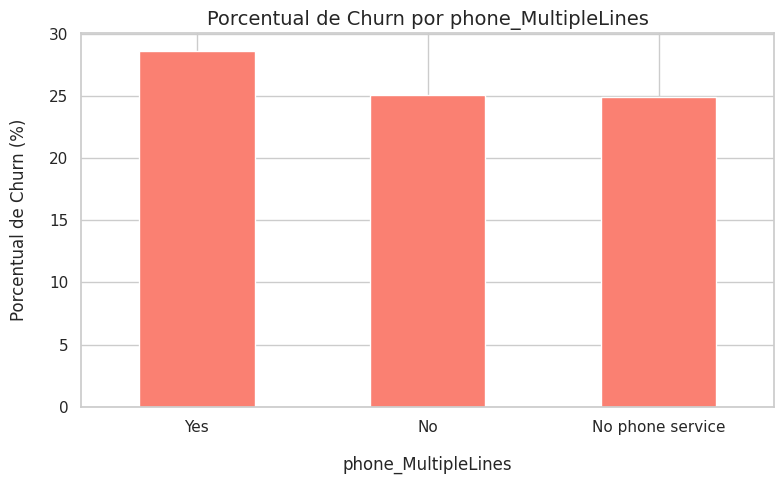

----------------------------------------

Analizando el servicio: 'internet_InternetService'
Tabla de Cantidades:
Churn                       No   Yes
internet_InternetService            
DSL                       1962   459
Fiber optic               1799  1297
No                        1413   113

Porcentual de Churn (%):
Churn                        No    Yes
internet_InternetService              
DSL                       81.04  18.96
Fiber optic               58.11  41.89
No                        92.60   7.40


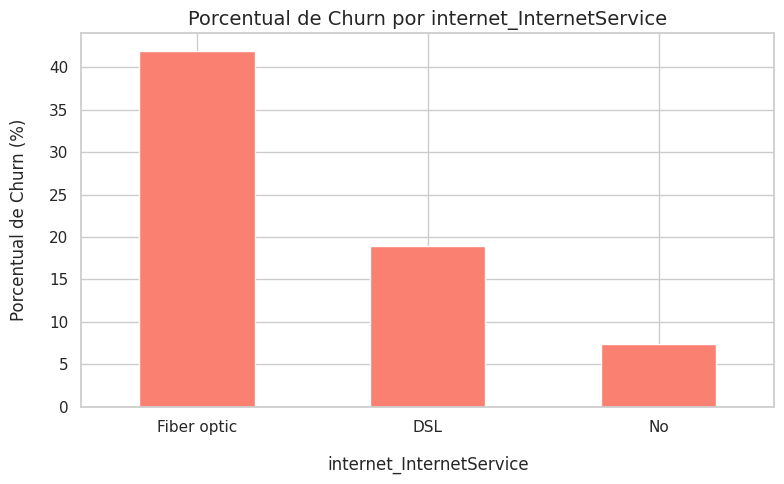

----------------------------------------

Analizando el servicio: 'internet_OnlineSecurity'
Tabla de Cantidades:
Churn                      No   Yes
internet_OnlineSecurity            
No                       2037  1461
No internet service      1413   113
Yes                      1724   295

Porcentual de Churn (%):
Churn                       No    Yes
internet_OnlineSecurity              
No                       58.23  41.77
No internet service      92.60   7.40
Yes                      85.39  14.61


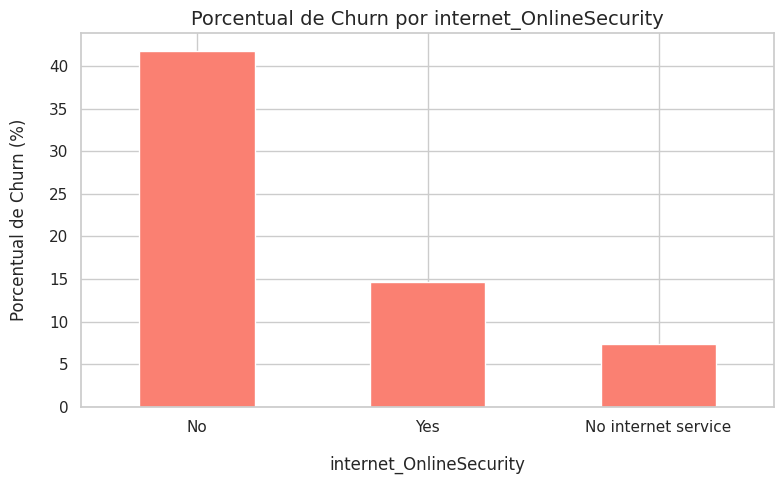

----------------------------------------

Analizando el servicio: 'internet_OnlineBackup'
Tabla de Cantidades:
Churn                    No   Yes
internet_OnlineBackup            
No                     1855  1233
No internet service    1413   113
Yes                    1906   523

Porcentual de Churn (%):
Churn                     No    Yes
internet_OnlineBackup              
No                     60.07  39.93
No internet service    92.60   7.40
Yes                    78.47  21.53


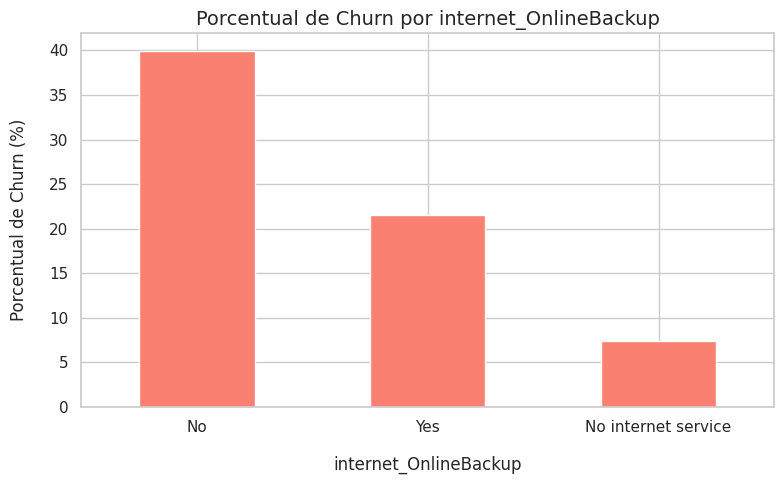

----------------------------------------

Analizando el servicio: 'internet_DeviceProtection'
Tabla de Cantidades:
Churn                        No   Yes
internet_DeviceProtection            
No                         1884  1211
No internet service        1413   113
Yes                        1877   545

Porcentual de Churn (%):
Churn                         No    Yes
internet_DeviceProtection              
No                         60.87  39.13
No internet service        92.60   7.40
Yes                        77.50  22.50


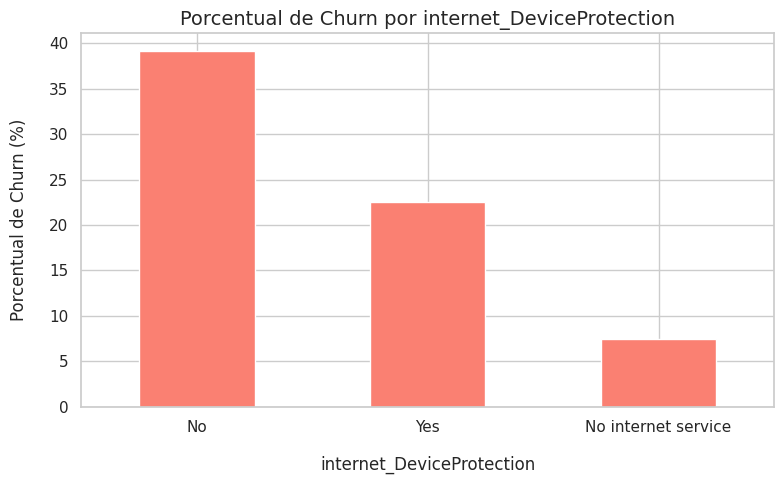

----------------------------------------

Analizando el servicio: 'internet_TechSupport'
Tabla de Cantidades:
Churn                   No   Yes
internet_TechSupport            
No                    2027  1446
No internet service   1413   113
Yes                   1734   310

Porcentual de Churn (%):
Churn                    No    Yes
internet_TechSupport              
No                    58.36  41.64
No internet service   92.60   7.40
Yes                   84.83  15.17


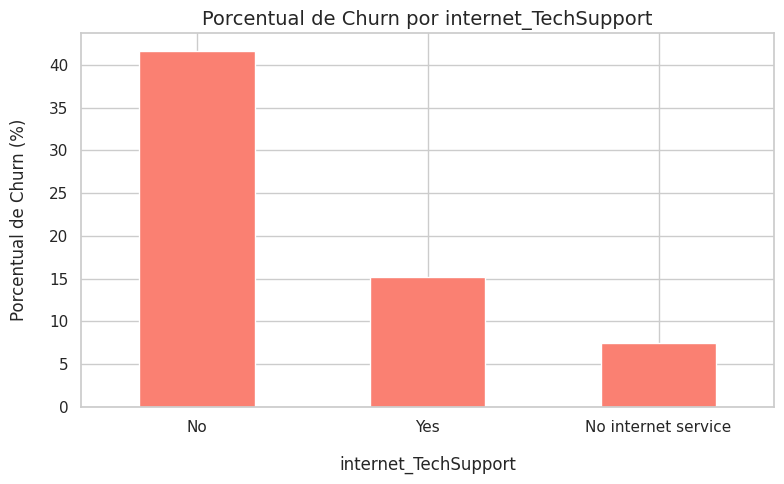

----------------------------------------

Analizando el servicio: 'internet_StreamingTV'
Tabla de Cantidades:
Churn                   No  Yes
internet_StreamingTV           
No                    1868  942
No internet service   1413  113
Yes                   1893  814

Porcentual de Churn (%):
Churn                    No    Yes
internet_StreamingTV              
No                    66.48  33.52
No internet service   92.60   7.40
Yes                   69.93  30.07


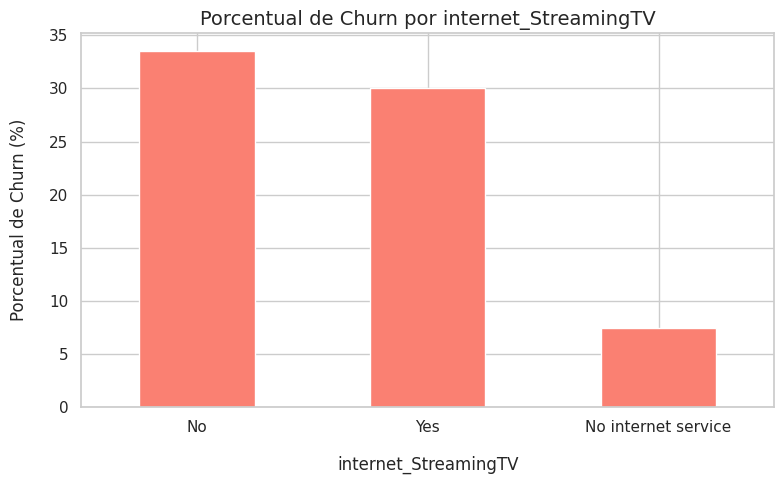

----------------------------------------

Analizando el servicio: 'internet_StreamingMovies'
Tabla de Cantidades:
Churn                       No  Yes
internet_StreamingMovies           
No                        1847  938
No internet service       1413  113
Yes                       1914  818

Porcentual de Churn (%):
Churn                        No    Yes
internet_StreamingMovies              
No                        66.32  33.68
No internet service       92.60   7.40
Yes                       70.06  29.94


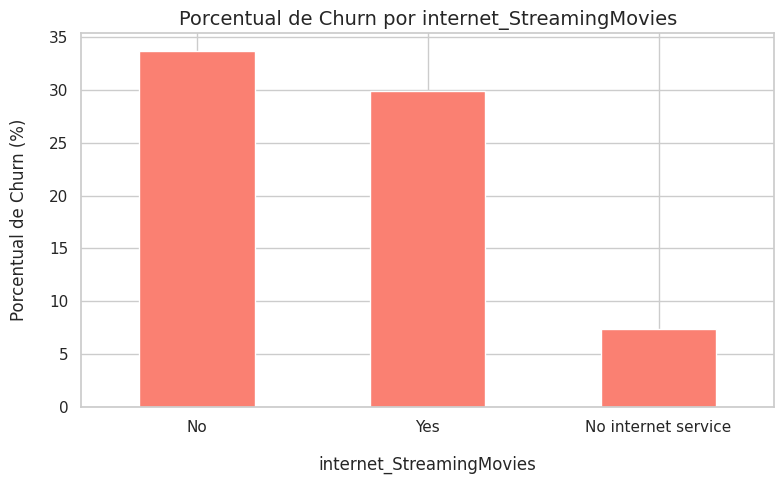

----------------------------------------

Analizando el servicio: 'account_PaperlessBilling'
Tabla de Cantidades:
Churn                       No   Yes
account_PaperlessBilling            
No                        2403   469
Yes                       2771  1400

Porcentual de Churn (%):
Churn                        No    Yes
account_PaperlessBilling              
No                        83.67  16.33
Yes                       66.43  33.57


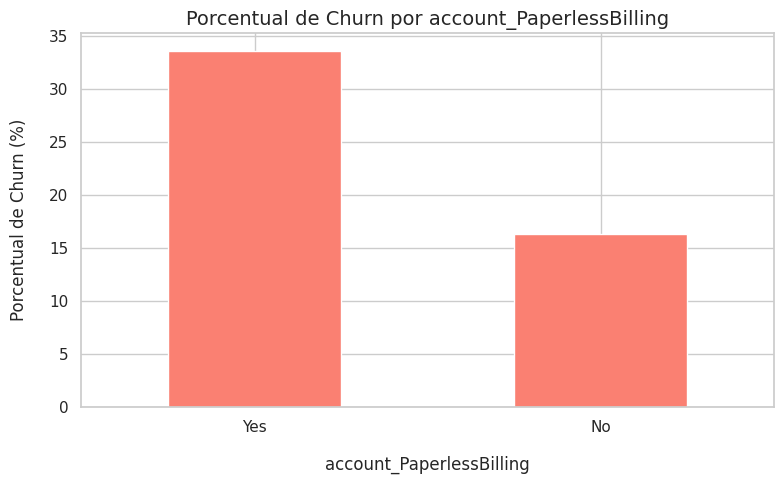

----------------------------------------

Resumen del porcentaje de abandono por categoría de servicio:
  phone_PhoneService: {'No': 24.926686217008797, 'Yes': 26.70963684955196}
  phone_MultipleLines: {'No': 25.04424778761062, 'No phone service': 24.926686217008797, 'Yes': 28.6098956580276}
  internet_InternetService: {'DSL': 18.95910780669145, 'Fiber optic': 41.89276485788114, 'No': 7.404980340760157}
  internet_OnlineSecurity: {'No': 41.76672384219554, 'No internet service': 7.404980340760157, 'Yes': 14.611193660227837}
  internet_OnlineBackup: {'No': 39.92875647668394, 'No internet service': 7.404980340760157, 'Yes': 21.531494442157268}
  internet_DeviceProtection: {'No': 39.127625201938606, 'No internet service': 7.404980340760157, 'Yes': 22.50206440957886}
  internet_TechSupport: {'No': 41.63547365390153, 'No internet service': 7.404980340760157, 'Yes': 15.166340508806261}
  internet_StreamingTV: {'No': 33.52313167259787, 'No internet service': 7.404980340760157, 'Yes': 30.070188

In [413]:
# Gráficos de Barras Cancelacion vs. tipos de servicios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista las columnas de servicios para analizar
service_columns = [
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]

churn_by_service = {}

print("Análisis de Churn por Servicio:")
print("=" * 40)

for service in service_columns:
    print(f"\nAnalizando el servicio: '{service}'")


    contingency_table = pd.crosstab(df[service], df['Churn'])
    print("Tabla de Cantidades:")
    print(contingency_table)

    contingency_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

    if 'Yes' in contingency_percent.columns:
        churn_by_service[service] = contingency_percent['Yes'].to_dict()
        print("\nPorcentual de Churn (%):")
        print(contingency_percent[['No', 'Yes']].round(2))
    else:
        churn_by_service[service] = {cat: 0 for cat in contingency_table.index}
        print("\nPorcentual de Churn (%):")
        print(contingency_table.apply(lambda x: x/x.sum(), axis=1).round(2) * 100)


    plt.figure(figsize=(8, 5))

    if 'Yes' in contingency_percent.columns:
        contingency_percent['Yes'].sort_values(ascending=False).plot(kind='bar', color='salmon')
        plt.ylabel('Porcentual de Churn (%)', labelpad=15, fontsize=12)
        plt.title(f'Porcentual de Churn por {service}', fontsize=14)
    else:
        contingency_percent['No'].sort_values(ascending=False).plot(kind='bar', color='lightblue')
        plt.ylabel('Porcentual de NO Churn (%)', labelpad=15, fontsize=12)
        plt.title(f'Porcentual de NO Churn por {service}', fontsize=14)

    plt.xlabel(service, labelpad=15, fontsize=12)
    plt.xticks(rotation=0, ha='center')
    plt.tight_layout()
    plt.show()

    print("-" * 40)


print("\nResumen del porcentaje de abandono por categoría de servicio:")
for service, churn_rates in churn_by_service.items():
    print(f"  {service}: {churn_rates}")


highest_churn_rate = 0
service_most_related = None
category_most_related = None

for service, churn_rates in churn_by_service.items():
    for category, rate in churn_rates.items():
        if rate > highest_churn_rate:
            highest_churn_rate = rate
            service_most_related = service
            category_most_related = category

print(f"\nEl servicio más relacionado con el abandono (con la tasa de abandono más alta en una categoría) es:")
if service_most_related:
    print(f"  Serviço: '{service_most_related}'")
    print(f"  Categoria: '{category_most_related}'")
    print(f"  Taza de Churn: {highest_churn_rate:.2f}%")
else:
    print("  No se puede determinar el servicio más relacionado con Churn.")

print("=" * 40)
print("Análisis Concluído.")


>Los gráficos sugieren que el servicio más relacionado con la pérdida de clientes (con la tasa de pérdida más alta en una categoría) es: Servicio: 'internet_InternetService'

## Gráfico de mapa de calor para la correlación entre los Servicios y las Bajas

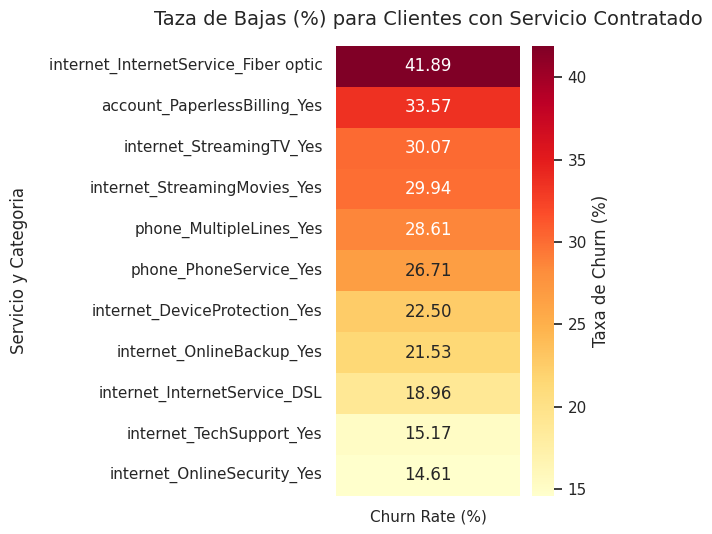

In [414]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista das colunas de serviços para análise
service_columns = [
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]

# Diccionario para almacenar tasas de abandono para categorías "Yes" o equivalentes
churn_rates_yes_dict = {}

for service in service_columns:
    # Crea la tabla de contingencia entre el servicio y Churn
    contingency_table = pd.crosstab(df[service], df['Churn'])

    # Calcula el porcentaje de abandono dentro de cada categoría de servicio
    contingency_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
    contingency_percent = contingency_percent.fillna(0) # Preenche NaNs com 0

    # Comprueba si existe la columna 'Yes' y si existe la categoría 'Yes' en ese servicio
    if 'Yes' in contingency_percent.columns:
        # Considera únicamente categorías que indican adherencia al servicio
        # (generalmente 'Yes', mas 'Fiber optic' y 'DSL' para InternetService)
        if service == 'internet_InternetService':
            # Para InternetService, considere 'Fiber optic' y 'DSL'
            for category in ['Fiber optic', 'DSL']:
                if category in contingency_percent.index:
                     heatmap_key = f"{service}_{category}"
                     churn_rates_yes_dict[heatmap_key] = contingency_percent.loc[category, 'Yes']
        elif 'Yes' in contingency_percent.index:
             # Para otros servicios, considere la categoría'Yes'
             heatmap_key = f"{service}_Yes"
             churn_rates_yes_dict[heatmap_key] = contingency_percent.loc['Yes', 'Yes']


# Convierte el diccionario en un DataFrame para el mapa de calor
churn_heatmap_yes_data = pd.DataFrame.from_dict(churn_rates_yes_dict, orient='index', columns=['Churn Rate (%)'])

# Ordene los valores para una mejor visualización en el mapa de calor
churn_heatmap_yes_data = churn_heatmap_yes_data.sort_values(by='Churn Rate (%)', ascending=False)

# Crea heatmap
plt.figure(figsize=(6, len(churn_heatmap_yes_data) * 0.5)) # Ajusta a altura com base no número de barras
sns.heatmap(churn_heatmap_yes_data, annot=True, fmt=".2f", cmap="YlOrRd", cbar_kws={'label': 'Taxa de Churn (%)'})

plt.title("Taza de Bajas (%) para Clientes con Servicio Contratado", fontsize=14, pad=15)
plt.ylabel("Servicio y Categoria", fontsize=12, labelpad=15)
plt.xlabel("") # Quita la etiqueta del eje x

plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Los servicios mencionados tienen un impacto variable en la retención, y algunos presentan tasas de abandono muy altas, lo que indica posibles vulnerabilidades en la experiencia del cliente.

Observaciones clave: La fibra óptica presenta la tasa de abandono más alta (41,89%). Esto sugiere que, si bien es un servicio popular, puede estar asociado con la insatisfacción del cliente, ya sea por el costo, la calidad o el servicio. Vale la pena investigar el motivo de esta alta tasa de abandono.

La facturación electrónica y el streaming (TV y películas) tienen una tasa de abandono relativamente alta. Los clientes que optan por la facturación digital y los servicios de entretenimiento muestran una mayor tendencia a cancelar. Esto puede indicar que este perfil de usuario busca comodidad y puede ser más sensible a los cambios en la experiencia o los precios.

Servicios como seguridad en línea, soporte técnico y protección de dispositivos tienen una tasa de abandono significativamente menor. Los clientes que contratan estos servicios adicionales tienden a permanecer más tiempo. Esto sugiere que invertir en protección, soporte y seguridad digital puede ser una buena estrategia de fidelización.

¿Qué podemos hacer con esta información?

Investigar la alta tasa de abandono de fibra: Analizar si hay quejas frecuentes sobre precio, velocidad o soporte técnico.

Revisar la experiencia de los clientes que utilizan la Facturación Electrónica y la Transmisión: Estos grupos pueden tener expectativas específicas o ser más propensos a probar con la competencia.

Ampliar los servicios de soporte y seguridad: Dado que estos servicios ya tienen una tasa de abandono más baja, ofrecer paquetes que incluyan seguridad digital y soporte técnico puede fortalecer la retención.

## Gráfico de barras de Bajas por tipo de contrato (mes, año, dos años)

Cantidad de Clientes (No Churn vs. Churn) por Tipo de Contrato:
Churn               No   Yes
account_Contract            
Month-to-month    2220  1655
One year          1307   166
Two year          1647    48

Porcentual de Cancelaciones (Churn) por Tipo de Contrato:
Churn                 No     Yes
account_Contract                
Month-to-month    57.29%  42.71%
One year          88.73%  11.27%
Two year          97.17%   2.83%


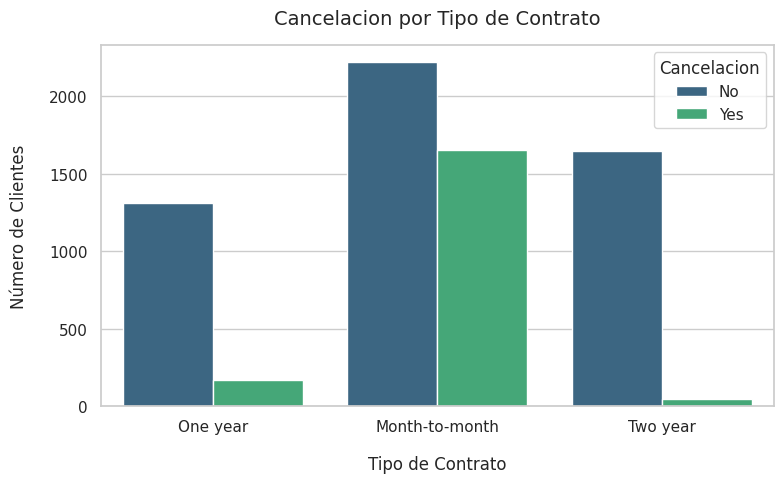

In [415]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


if 'account_Contract' in df.columns and 'Churn' in df.columns:

    churn_por_contrato = df.groupby(['account_Contract', 'Churn']).size().unstack(fill_value=0)


    churn_por_contrato_contagem = churn_por_contrato[['No', 'Yes']]
    print("Cantidad de Clientes (No Churn vs. Churn) por Tipo de Contrato:")
    print(churn_por_contrato_contagem)


    churn_por_contrato['Total'] = churn_por_contrato['No'] + churn_por_contrato['Yes']


    churn_por_contrato_percentual = churn_por_contrato.div(churn_por_contrato['Total'], axis=0) * 100


    churn_por_contrato_percentual_selecionado = churn_por_contrato_percentual[['No', 'Yes']]


    churn_por_contrato_percentual_formatado = churn_por_contrato_percentual_selecionado.map(lambda x: f'{x:.2f}%')

    print("\nPorcentual de Cancelaciones (Churn) por Tipo de Contrato:")
    print(churn_por_contrato_percentual_formatado)


    plt.figure(figsize=(8, 5))

    sns.countplot(data=df, x='account_Contract', hue='Churn', palette='viridis')

    plt.title("Cancelacion por Tipo de Contrato", pad=15, fontsize=14)
    plt.xlabel("Tipo de Contrato", labelpad=15, ha='center', fontsize=12)
    plt.ylabel("Número de Clientes", labelpad=15, fontsize=12)
    plt.xticks(rotation=0, ha='center')
    plt.legend(title='Cancelacion', loc='upper right')
    plt.tight_layout()
    plt.show()


## Cuadros comparativos de métodos de pago según duración del contrato

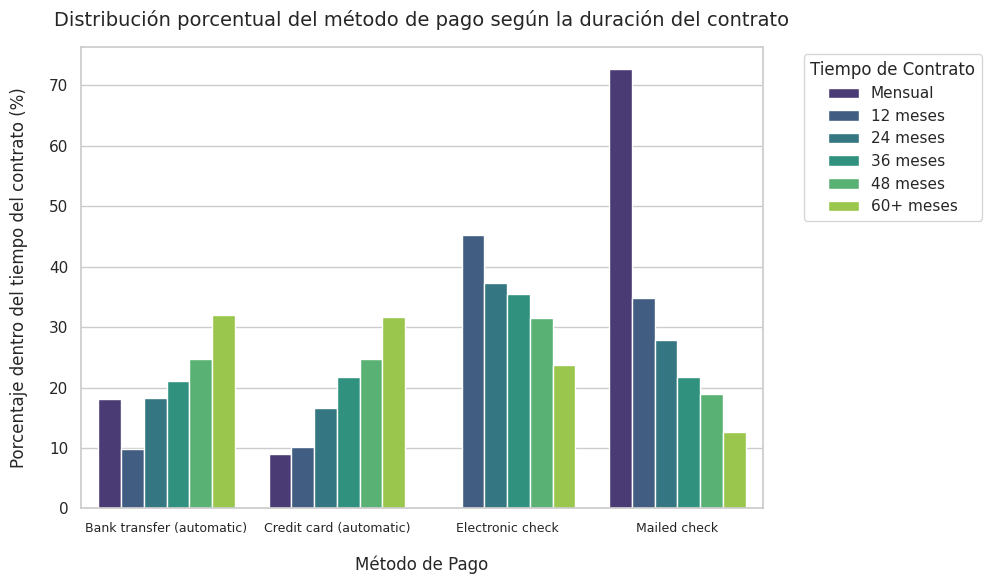

In [416]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df['customer_tenure'] = pd.to_numeric(df['customer_tenure'], errors='coerce')


df.dropna(subset=['customer_tenure'], inplace=True)


bins = [0, 1, 12, 24, 36, 48, 60, df['customer_tenure'].max()] # 8 limites -> 7 intervalos. Esto es correcto.


bins = [0, 1, 12, 24, 36, 48, df['customer_tenure'].max()] # 7 limites -> 6 intervalos
labels = ["Mensual", "12 meses", "24 meses", "36 meses", "48 meses", "60+ meses"] # 6 rótulos

df['Tenure_Group'] = pd.cut(df['customer_tenure'], bins=bins, labels=labels, right=False, include_lowest=True)


if not df['Tenure_Group'].isnull().all():

    contingency_table = pd.crosstab(df['Tenure_Group'], df['account_PaymentMethod'])


    contingency_table_sum = contingency_table.sum(axis=1)
    contingency_percent = contingency_table.div(contingency_table_sum, axis=0) * 100


    contingency_percent = contingency_percent.fillna(0)


    plt.figure(figsize=(12, 6))


    plot_data = contingency_percent.reset_index().melt(id_vars="Tenure_Group")




    sns.barplot(data=plot_data,
                x="account_PaymentMethod",
                y="value",
                hue="Tenure_Group",        # Segmentación de tiempo por color/grupo por contrato
                palette="viridis")


    plt.title("Distribución porcentual del método de pago según la duración del contrato", fontsize=14, pad=15)
    plt.xlabel("Método de Pago", fontsize=12, labelpad=15)
    plt.ylabel("Porcentaje dentro del tiempo del contrato (%)", fontsize=12, labelpad=15) # Adiciona '%'


    plt.xticks(rotation=0, fontsize=9, ha="center")


    plt.legend(title="Tiempo de Contrato", bbox_to_anchor=(1.05, 1), loc='upper left')


    plt.tight_layout(rect=[0, 0, 0.85, 1])

    plt.show()

else:
    print("Error: La columna 'Tenure_Group' no se creó correctamente o está vacía. Revise los datos de 'customer_tenure' y la definición del contenedor.")


Este gráfico muestra cómo varían las preferencias de pago según el tipo de contrato. Los clientes con contratos mensuales prefieren los pagos tradicionales, como los cheques por correo, posiblemente porque desean un mayor control sobre sus finanzas o no están tan acostumbrados a las transacciones digitales. En los contratos de 12 y 24 meses, los cheques electrónicos son cada vez más comunes, lo que indica que los clientes a medio plazo podrían preferir alternativas digitales, aunque aún sin automatización completa. En contratos más largos, como los de 48 meses, las transferencias bancarias automáticas son más comunes, lo que sugiere que los clientes con compromisos más largos buscan comodidad. En contratos de más de 60 meses, los pagos automáticos con tarjeta de crédito son el método preferido, lo que demuestra que los clientes a largo plazo valoran la comodidad.

¿Qué indican estos datos?

Los clientes con contratos mensuales evitan los métodos automáticos, quizás por miedo a la cancelación o por una mayor necesidad de control financiero.

El uso de pagos automáticos aumenta a medida que se extiende el contrato, lo que refleja una mayor confianza y compromiso del cliente.

Los clientes a medio plazo aún optan por las transacciones electrónicas, aunque sin automatización completa, lo que puede indicar cautela a la hora de fidelizar a los clientes.

Con estos datos, la empresa puede ajustar sus estrategias de pago y retención, garantizando que las opciones ofrecidas se ajusten mejor a las necesidades de cada grupo de clientes. Si desea profundizar en este análisis, puedo ayudarle.

## Impacto de los servicios en la retención de clientes

In [417]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df.dropna(subset=['Churn'], inplace=True)


service_columns = [
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

print("Análisis de retención (Churn Rate) por tipo de servicio:")
print("="*70)

results = {}

for col in service_columns:
    print(f"\nAnalizando '{col}':")


    if col == 'internet_InternetService':

        ct = pd.crosstab(df[col], df['Churn'])


        ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100
        ct_percent = ct_percent.fillna(0)

        print("Porcentual de Churn por Categoria de Internet Service:")

        print(ct_percent[['Yes']].map(lambda x: f'{x:.2f}%'))

        results[col] = ct_percent['Yes'].to_dict()
        print("-" * 30)

    else:

        if df[col].nunique() > 1:

            ct = pd.crosstab(df[col], df['Churn'])


            if 'Total' in ct.columns:
                 ct = ct.drop(columns=['Total'], errors='ignore')

            ct_sum = ct.sum(axis=1)

            ct_percent = ct.div(ct_sum, axis=0) * 100
            ct_percent = ct_percent.fillna(0)

            print("Porcentaje de abandono por estado del servicio ('Sí' vs. 'No'):")

            if 'Yes' in ct_percent.columns:
                 print(ct_percent[['Yes']].map(lambda x: f'{x:.2f}%'))

                 results[col] = ct_percent['Yes'].to_dict()
            else:
                 print("No hay clientes con Churn 'Yes' para esta columna.")

                 results[col] = {val: 0.0 for val in df[col].unique()}


            print("-" * 30)
        else:
            print(f"Columna '{col}' tiene apenas un valor único. No es útil para el análisis de retención comparativa.")
            print("-" * 30)

print("\nResumen del análisis de abandono por servicio:")
print("="*70)


services_with_binary_comparison = {}

for col, churn_rates in results.items():
    if col == 'internet_InternetService':

        print(f"'{col}':")

        if churn_rates:
            min_churn_cat = min(churn_rates, key=churn_rates.get)
            max_churn_cat = max(churn_rates, key=churn_rates.get)
            print(f"  Mayor Retencion (Menor Churn): Categoria '{min_churn_cat}' ({churn_rates[min_churn_cat]:.2f}%)")
            print(f"  Menor Retencion (Maior Churn): Categoria '{max_churn_cat}' ({churn_rates[max_churn_cat]:.2f}%)")
        else:
             print("  Datos insuficientes para esta análisis.")

    elif 'Yes' in churn_rates and ('No' in churn_rates or 'No phone service' in churn_rates or 'No internet service' in churn_rates):

        churn_yes = churn_rates.get('Yes', np.nan)

        churn_no = np.nan
        if 'No' in churn_rates:
             churn_no = churn_rates['No']
        elif 'No phone service' in churn_rates:
             churn_no = churn_rates['No phone service']
        elif 'No internet service' in churn_rates:
             churn_no = churn_rates['No internet service']


        print(f"'{col}':")
        if not np.isnan(churn_yes) and not np.isnan(churn_no):
            print(f"  Churn (Con el servicio): {churn_yes:.2f}%")
            print(f"  Churn (Sin el servicio): {churn_no:.2f}%")


            if churn_yes < churn_no:
                print("  Impacto en la retención: Positivo (menor tasa de abandono para quienes cuentan con el servicio)")
                services_with_binary_comparison[col] = {'churn_yes': churn_yes, 'churn_no': churn_no, 'impact': 'Positive'}
            elif churn_yes > churn_no:
                print("  Impacto en la retención: Negativo (Mayor tasa de abandono para quienes tienen el servicio)")
                services_with_binary_comparison[col] = {'churn_yes': churn_yes, 'churn_no': churn_no, 'impact': 'Negative'}
            else:
                print("  Impacto en la retención: Neutral (tasas de abandono similares)")
                services_with_binary_comparison[col] = {'churn_yes': churn_yes, 'churn_no': churn_no, 'impact': 'Neutral'}
        else:
            print("  Datos insuficientes para la comparación binaria (faltan datos para 'Sí' o 'No').")

    else:
         print(f"'{col}': No es un servicio binario típico o faltan datos para la comparación.")

         if churn_rates:
             print("  Tasas de Churn disponibles:", churn_rates)
         else:
             print("  No se calcula la tasa de Churn.")


print("\nConclusión basada en el impacto en la retención (comparando la tasa de abandono con y sin el servicio):")
print("="*100)


positive_impact_services = {k: v for k, v in services_with_binary_comparison.items() if v['impact'] == 'Positive'}
negative_impact_services = {k: v for k, v in services_with_binary_comparison.items() if v['impact'] == 'Negative'}
neutral_impact_services = {k: v for k, v in services_with_binary_comparison.items() if v['impact'] == 'Neutral'}


print("Servicios con *MÁS* Retención (Tasa de abandono *Más baja* para quienes tienen el servicio):")
if positive_impact_services:

    best_retention_service = min(positive_impact_services, key=lambda k: positive_impact_services[k]['churn_yes'])
    rates = positive_impact_services[best_retention_service]
    print(f"- **{best_retention_service}**: Churn para los que TIENEN: {rates['churn_yes']:.2f}%, Churn para los que NO LO TIENEN: {rates['churn_no']:.2f}%")
else:
    print("- Ningún servicio binario ha demostrado claramente que TENER el servicio resulte en una menor tasa de abandono..")


print("\nServicios que NO son muy significativos para retener clientes (tasa de abandono *más alta* o similar para quienes tienen el servicio):")
if negative_impact_services:

     worst_retention_service = max(negative_impact_services, key=lambda k: negative_impact_services[k]['churn_yes'])
     rates = negative_impact_services[worst_retention_service]
     print(f"- **{worst_retention_service}**: Churn para los que TIENEN: {rates['churn_yes']:.2f}%, Churn para los que NO LO TIENEN: {rates['churn_no']:.2f}%")
elif neutral_impact_services:
     print("- Ningún servicio binario ha mostrado claramente un impacto negativo. Los servicios neutrales son:")
     for service, rates in neutral_impact_services.items():
          print(f"  - {service}: Churn para los que TIENEN: {rates['churn_yes']:.2f}%, Churn para los que NO LO TIENEN: {rates['churn_no']:.2f}%")
else:
    print("- Todos los servicios binarios parecen tener un impacto neutral o positivo.")


print("\nConsideracion especial: Internet Service")
if 'internet_InternetService' in results:
    churn_internet = results['internet_InternetService']
    print(f"- Para '{'internet_InternetService'}':")
    if churn_internet:
        min_churn_cat = min(churn_internet, key=churn_internet.get)
        max_churn_cat = max(churn_internet, key=churn_internet.get)
        print(f"  - Clientes sin servicio de internet ('{min_churn_cat}') tienen la tasa de Churn *más baja* ({churn_internet[min_churn_cat]:.2f}%).")
        print(f"  - Clientes con Fibra Óptica ('{max_churn_cat}') tienen la tasa de Churn *más alta* ({churn_internet[max_churn_cat]:.2f}%).")
    else:
         print("  - Datos insuficientes para analizar Internet Service.")

print("\nNota: Este análisis compara la tasa de abandono entre los clientes que tienen un servicio específico y los que no. Los servicios con menor tasa de abandono para quienes sí los tienen *sugieren* una mayor retención, pero esto puede verse influenciado por otros factores (p. ej., los clientes a largo plazo tienden a tener más servicios y también una menor tasa de abandono general). Se necesitaría un análisis más profundo (como modelos de aprendizaje automático) para determinar la *causalidad* o el impacto aislado de cada servicio.")


Análisis de retención (Churn Rate) por tipo de servicio:

Analizando 'phone_PhoneService':
Porcentaje de abandono por estado del servicio ('Sí' vs. 'No'):
Churn                  Yes
phone_PhoneService        
No                  24.93%
Yes                 26.71%
------------------------------

Analizando 'phone_MultipleLines':
Porcentaje de abandono por estado del servicio ('Sí' vs. 'No'):
Churn                   Yes
phone_MultipleLines        
No                   25.04%
No phone service     24.93%
Yes                  28.61%
------------------------------

Analizando 'internet_InternetService':
Porcentual de Churn por Categoria de Internet Service:
Churn                        Yes
internet_InternetService        
DSL                       18.96%
Fiber optic               41.89%
No                         7.40%
------------------------------

Analizando 'internet_OnlineSecurity':
Porcentaje de abandono por estado del servicio ('Sí' vs. 'No'):
Churn                       Yes
internet_O

## Análisis de gráfico de barras de retención (Churn Rate) por tipo de servicio:

Análisis de retención (tasa de abandono) por tipo de servicio:

Analizando 'phone_PhoneService':
Percentual de Churn por status de serviço ('Sim' vs 'Não'):
Churn                  Yes
phone_PhoneService        
No                  24.93%
Yes                 26.71%
------------------------------

Analizando 'phone_MultipleLines':
Percentual de Churn por status de serviço ('Sim' vs 'Não'):
Churn                   Yes
phone_MultipleLines        
No                   25.04%
No phone service     24.93%
Yes                  28.61%
------------------------------

Analizando 'internet_InternetService':
Percentual de Churn por Categoria de Internet Service:
Churn                        Yes
internet_InternetService        
DSL                       18.96%
Fiber optic               41.89%
No                         7.40%
------------------------------

Analizando 'internet_OnlineSecurity':
Percentual de Churn por status de serviço ('Sim' vs 'Não'):
Churn                       Yes
internet_OnlineS

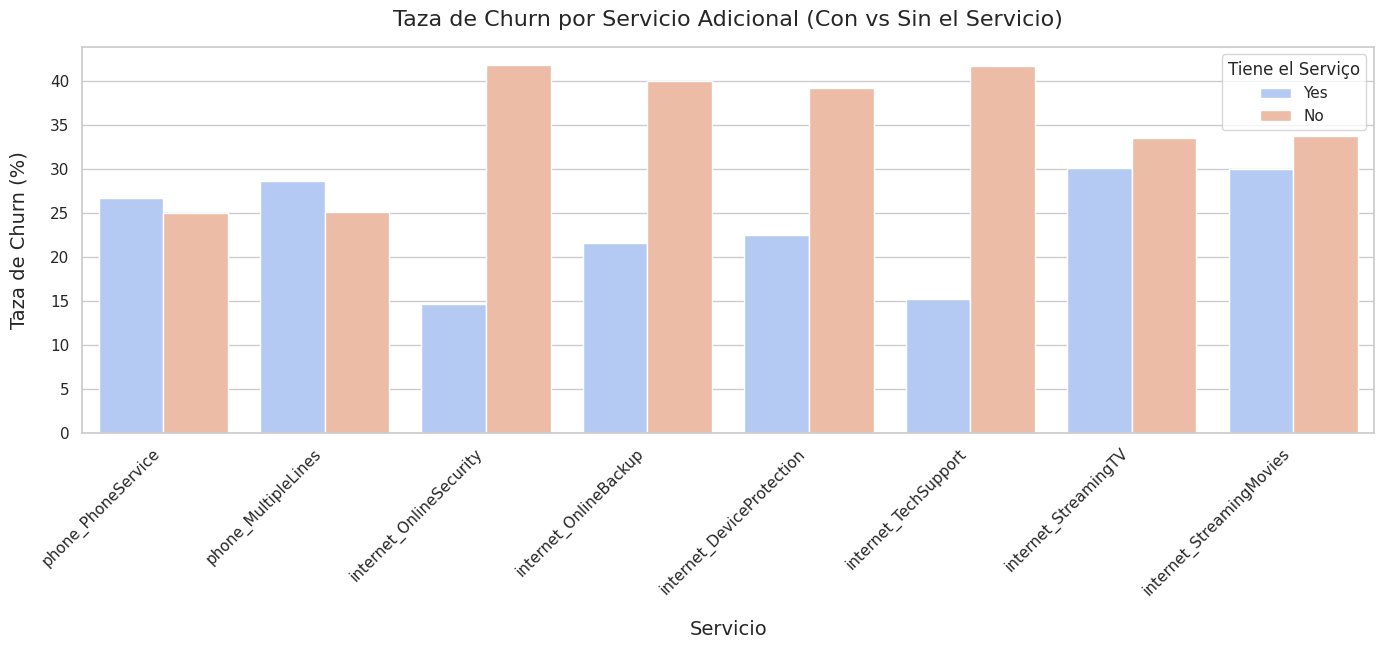

/tmp/ipython-input-1389452584.py:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=internet_plot_df, x='Internet_Type', y='Churn_Rate', palette='viridis')


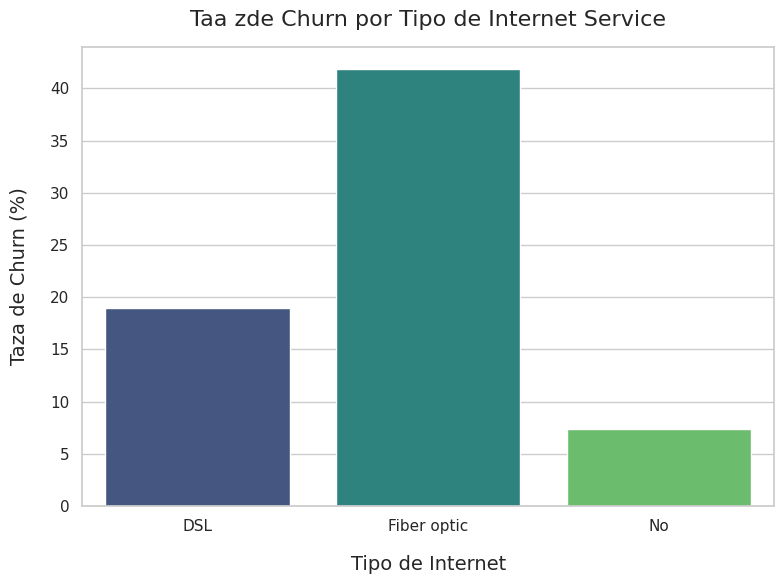

In [420]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df.dropna(subset=['Churn'], inplace=True)


service_columns = [
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

print("Análisis de retención (tasa de abandono) por tipo de servicio:")
print("="*70)

results = {}

for col in service_columns:
    print(f"\nAnalizando '{col}':")


    if col == 'internet_InternetService':
        # Calcula la tabla de contingencia para InternetService y Churn
        ct = pd.crosstab(df[col], df['Churn'])

        # Calcula el porcentual de Churn dentro de cada categoria de InternetService
        ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100
        ct_percent = ct_percent.fillna(0) # Rellena los NaN con 0

        print("Percentual de Churn por Categoria de Internet Service:")
        # Formato para mostrar como porcentual
        print(ct_percent[['Yes']].map(lambda x: f'{x:.2f}%'))

        # Almacena los resultados. Aquí, la retención/abandono se realiza por tipo específico. (DSL, Fiber optic, No)
        # Los clientes sin servicio de Internet tienen una tasa de Churn muy baja, lo que sugiere una alta retención para este grupo..
        # Los clientes de fibra óptica tienen una tasa de Churn muy alta, lo que sugiere una baja retención.
        results[col] = ct_percent['Yes'].to_dict() # Almacena los porcentajes de Churn 'Yes'
        print("-" * 30) # Separador

    else:
        # Para columnas binárias ('Yes'/'No', o similar)
        # Asegúrese de que haya clientes con y sin el servicio (evitar errores de crosstab)
        if df[col].nunique() > 1:
            # Calcula la tabla de contingencia
            ct = pd.crosstab(df[col], df['Churn'])

            # Calcula el porcentual de Churn DENTRO de cada categoria ('Yes' y 'No')
            # Ignora a columna 'Total' si existe de cálculos anteriores
            if 'Total' in ct.columns:
                 ct = ct.drop(columns=['Total'], errors='ignore')

            ct_sum = ct.sum(axis=1)
            # Evite la división por cero si una categoría no tiene clientes
            ct_percent = ct.div(ct_sum, axis=0) * 100
            ct_percent = ct_percent.fillna(0) # Rellena los NaN con 0

            print("Percentual de Churn por status de serviço ('Sim' vs 'Não'):")
            # Muestra el porcentual de Churn ('Yes') para cada status ('No', 'Yes', etc.)
            if 'Yes' in ct_percent.columns:
                 print(ct_percent[['Yes']].map(lambda x: f'{x:.2f}%'))
                 # Almacena resultados para facilitar su comparación posterior
                 results[col] = ct_percent['Yes'].to_dict()
            else:
                 print("Nenhum cliente com Churn 'Yes' para esta coluna.")
                 # Si no hay 'Yes' Churn en tabla, crea una entrada con 0%
                 results[col] = {val: 0.0 for val in df[col].unique()}


            print("-" * 30) # Separador
        else:
            print(f"Columna '{col}' tiene un único valor. No es útil para el análisis comparativo de retención.")
            print("-" * 30)

print("\nResumen del análisis de abandono por servicio:")
print("="*70)



services_with_binary_comparison = {}

for col, churn_rates in results.items():
    if col == 'internet_InternetService':

        print(f"'{col}':")
        # Encuentra la categoría con el precio más bajo y mayor churn para InternetService
        if churn_rates:
            min_churn_cat = min(churn_rates, key=churn_rates.get)
            max_churn_cat = max(churn_rates, key=churn_rates.get)
            print(f"  Mayor Retencion (Menor Churn): Categoria '{min_churn_cat}' ({churn_rates[min_churn_cat]:.2f}%)")
            print(f"  Menor Retencion (Maior Churn): Categoria '{max_churn_cat}' ({churn_rates[max_churn_cat]:.2f}%)")
        else:
             print("  Datos insuficientes para esta análisis.")

    elif 'Yes' in churn_rates and ('No' in churn_rates or 'No phone service' in churn_rates or 'No internet service' in churn_rates):
        # Para servicios binários (Si/No)
        churn_yes = churn_rates.get('Yes', np.nan) # Obtener Churn Rate para quienes la tienen
        # Intente encontrar Churn Rate de aquellos que NO la tienen
        churn_no = np.nan
        if 'No' in churn_rates:
             churn_no = churn_rates['No']
        elif 'No phone service' in churn_rates:
             churn_no = churn_rates['No phone service']
        elif 'No internet service' in churn_rates:
             churn_no = churn_rates['No internet service']


        print(f"'{col}':")
        if not np.isnan(churn_yes) and not np.isnan(churn_no):
            print(f"  Churn (Com o Serviço): {churn_yes:.2f}%")
            print(f"  Churn (Sem o Serviço): {churn_no:.2f}%")

            # Comparacion: Si Churn (Con) < Churn (Si), o servicio *Ayuda* en la retención.
            # Si Churn (Con) > Churn (Si), el servicio *No ayuda* en la retención, o incluso empeora.
            if churn_yes < churn_no:
                print("  Impacto en la retención: Positivo (menor tasa de abandono para quienes cuentan con el servicio))")
                services_with_binary_comparison[col] = {'churn_yes': churn_yes, 'churn_no': churn_no, 'impact': 'Positive'}
            elif churn_yes > churn_no:
                print("  Impacto en la retención: Negativo (Mayor tasa de abandono para quienes tienen el servicio)")
                services_with_binary_comparison[col] = {'churn_yes': churn_yes, 'churn_no': churn_no, 'impact': 'Negative'}
            else:
                print("  Impacto en la retención: Neutral (tasas de abandono similares)")
                services_with_binary_comparison[col] = {'churn_yes': churn_yes, 'churn_no': churn_no, 'impact': 'Neutral'}
        else:
            print("  Datos insuficientes para la comparación binaria (faltan datos para 'Sí' o 'No').")

    else:
         print(f"'{col}': No es un servicio binario típico o no hay datos para comparar.")

         if churn_rates:
             print("  Tasas de Churn disponibles:", churn_rates)
         else:
             print("  Ninguna taza de Churn calculada.")


print("\nConclusión basada en el impacto en la retención (comparando Churn 'con' y 'sin' el servicio):")
print("="*100)

# Iterar sobre los resultados de la comparación binaria para identificar los extremos
positive_impact_services = {k: v for k, v in services_with_binary_comparison.items() if v['impact'] == 'Positive'}
negative_impact_services = {k: v for k, v in services_with_binary_comparison.items() if v['impact'] == 'Negative'}
neutral_impact_services = {k: v for k, v in services_with_binary_comparison.items() if v['impact'] == 'Neutral'}


print("Servicios con *MÁS* Retención (Tasa de Churn *Más baja* para quienes tienen el servicio):")
if positive_impact_services:
    # Encuentre el servicio con la MAYOR diferencia porcentual positiva (churn_no - churn_yes)
    # o simplemente el servicio con la tasa de abandono más baja para aquellos que TIENEN el servicio
    # Centrémonos en el Churn más bajo de quienes TIENEN el servicio como indicador de "mayor retención".
    best_retention_service = min(positive_impact_services, key=lambda k: positive_impact_services[k]['churn_yes'])
    rates = positive_impact_services[best_retention_service]
    print(f"- **{best_retention_service}**: Churn para quienes TIENEN: {rates['churn_yes']:.2f}%, Churn para quienes NO TIENEN: {rates['churn_no']:.2f}%")
else:
    print("- Ningún servicio binario ha demostrado claramente que TENER el servicio resulte en una menor tasa de abandono.")


print("\nServicios que NO son muy significativos para retener clientes (tasa de abandono *más alta* o similar para quienes tienen el servicio):")
if negative_impact_services:
     # Encuentre el servicio con la tasa de abandono MÁS ALTA para aquellos que TIENEN el servicio (o la mayor diferencia churn_yes - churn_no)
     # Centrémonos en el Churn más alto de quienes TIENEN el servicio como indicador de “menos significativo” o “peor retención”
     worst_retention_service = max(negative_impact_services, key=lambda k: negative_impact_services[k]['churn_yes'])
     rates = negative_impact_services[worst_retention_service]
     print(f"- **{worst_retention_service}**: Churn para quienes TIENEN: {rates['churn_yes']:.2f}%, Churn para quienes NO TIENEN: {rates['churn_no']:.2f}%")
elif neutral_impact_services:
     print("- Ningún servicio binario ha mostrado claramente un impacto negativo. Los servicios neutrales son:")
     for service, rates in neutral_impact_services.items():
          print(f"  - {service}: Churn para quienes TIENEN: {rates['churn_yes']:.2f}%, Churn para quienes NO TIENEN: {rates['churn_no']:.2f}%")
else:
    print("- Todos los servicios binarios parecen tener un impacto neutral o positivo.")


print("\nConsideracion especial: Internet Service")
if 'internet_InternetService' in results:
    churn_internet = results['internet_InternetService']
    print(f"- Para '{'internet_InternetService'}':")
    if churn_internet:
        min_churn_cat = min(churn_internet, key=churn_internet.get)
        max_churn_cat = max(churn_internet, key=churn_internet.get)
        print(f"  - Clientes sin servicio de internet ('{min_churn_cat}') tienen *menor* taza de Churn ({churn_internet[min_churn_cat]:.2f}%).")
        print(f"  - Clientes con Fibra Optica ('{max_churn_cat}') tienen *mayor* taza de Churn ({churn_internet[max_churn_cat]:.2f}%).")
    else:
         print("  - Dados insuficientes para analizar Internet Service.")

print("\nNota: Este análisis compara la tasa de abandono entre los clientes que tienen un servicio específico y los que no. Los servicios con menor tasa de abandono para quienes sí los tienen *sugieren* una mayor retención, pero esto puede estar influenciado por otros factores (p. ej., los clientes a largo plazo tienden a tener más servicios y también una menor tasa de abandono general). Se necesitaría un análisis más profundo (como modelos de aprendizaje automático) para determinar la *causalidad* o el impacto aislado de cada servicio.")



if services_with_binary_comparison:

        plot_data = []
        for service, rates in services_with_binary_comparison.items():
            plot_data.append({'Service': service, 'Has_Service': 'Yes', 'Churn_Rate': rates['churn_yes']})
            plot_data.append({'Service': service, 'Has_Service': 'No', 'Churn_Rate': rates['churn_no']})
        plot_df = pd.DataFrame(plot_data)

        plt.figure(figsize=(14, 7))
        sns.barplot(data=plot_df, x='Service', y='Churn_Rate', hue='Has_Service', palette='coolwarm')

        plt.title('Taza de Churn por Servicio Adicional (Con vs Sin el Servicio)', fontsize=16, pad=15)
        plt.xlabel('Servicio', fontsize=14, labelpad=15)
        plt.ylabel('Taza de Churn (%)', fontsize=14, labelpad=15)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Tiene el Serviço')
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
else:
        print("No se encontraron servicios binarios para trazar.")

    # Gráfico separado para InternetService
if 'internet_InternetService' in results and results['internet_InternetService']:
         internet_churn_rates = results['internet_InternetService']
         internet_plot_df = pd.DataFrame(list(internet_churn_rates.items()), columns=['Internet_Type', 'Churn_Rate'])

         plt.figure(figsize=(8, 6))
         sns.barplot(data=internet_plot_df, x='Internet_Type', y='Churn_Rate', palette='viridis')

         plt.title('Taa zde Churn por Tipo de Internet Service', fontsize=16, pad=15)
         plt.xlabel('Tipo de Internet', fontsize=14, labelpad=15)
         plt.ylabel('Taza de Churn (%)', fontsize=14, labelpad=15)
         plt.tight_layout()
         plt.show()


In [421]:
import pandas as pd

# Verifique que su DataFrame 'df' está cargado y limpio
# Vamos garantizar que la columna 'internet_InternetService' exista
if 'internet_InternetService' in df.columns:

    print("Distribucion de Clientes por Tipo de Internet Service:")
    print("="*60)

    # Cuente el número de clientes en cada categoría de Internet Service
    internet_service_counts = df['internet_InternetService'].value_counts()
    print("\nCantidad de Clientes:")
    print(internet_service_counts)

    # Calcula el número total de clientes con algún tipo de servicio de internet o sin servicio
    total_customers = internet_service_counts.sum()
    print(f"\nTotal de Clientes en la base analizada: {total_customers}")

    # Calcula el porcentaje de cada categoría en relación al total
    internet_service_percent = (internet_service_counts / total_customers) * 100

    print("\nPorcentual de Clientes:")
    # Formato para mostrar como porcentaje con dos decimales
    print(internet_service_percent.map(lambda x: f'{x:.2f}%'))

    print("="*60)

    # Extrayendo los porcentajes específicos solicitados
    fiber_optic_percent = internet_service_percent.get('Fiber optic', 0.0) # Use .get para evitar erro se a categoria não existir
    dsl_percent = internet_service_percent.get('DSL', 0.0)
    no_internet_percent = internet_service_percent.get('No', 0.0) # Também é interessante saber quem não tem

    print(f"\nResumen de porcentajes:")
    print(f"- Clientes con Fibra Óptica: {fiber_optic_percent:.2f}%")
    print(f"- Clientes con DSL: {dsl_percent:.2f}%")
    print(f"- Clientes SIN Servicio de Internet: {no_internet_percent:.2f}%")


else:
    print("Error: La columna 'internet_InternetService' no fue encontrada en el DataFrame.")

Distribucion de Clientes por Tipo de Internet Service:

Cantidad de Clientes:
internet_InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Total de Clientes en la base analizada: 7043

Porcentual de Clientes:
internet_InternetService
Fiber optic    43.96%
DSL            34.37%
No             21.67%
Name: count, dtype: object

Resumen de porcentajes:
- Clientes con Fibra Óptica: 43.96%
- Clientes con DSL: 34.37%
- Clientes SIN Servicio de Internet: 21.67%


## Gráfico de barras para visualizar la tasa de abandono por tipo de servicio de Internet

Taza de Churn (%) por Tipo de Internet Service:
internet_InternetService
DSL            18.96%
Fiber optic    41.89%
No              7.40%
dtype: object


/tmp/ipython-input-2251535710.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x='Internet_Type', y='Churn_Rate', palette='viridis') # Utilice una paleta de colores adecuada


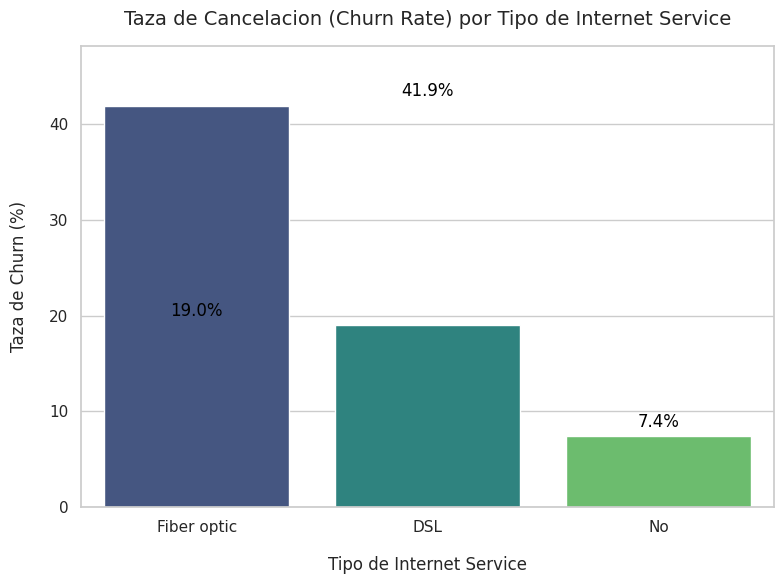

In [422]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df.dropna(subset=['Churn', 'internet_InternetService'], inplace=True)

# --- Cálculo da Taza de Churn por Tipo de Internet Service ---

# Calcula la tabla de contingencia para InternetService y Churn
# El resultado es un DataFrame con 'internet_InternetService' como índice y columnas 'No', 'Yes' (u otros valores de Churn)
ct = pd.crosstab(df['internet_InternetService'], df['Churn'])

# Verifica si la columna 'Yes' (para Churn) existe
if 'Yes' in ct.columns:
    # Calcula el total de clientes en cada categoria de Internet Service
    ct_sum = ct.sum(axis=1)

    # Calcula o percentual de Churn ('Yes') dentro de cada categoria de Internet Service
    # Divide la columna 'Yes' (cantidad de Churn) por el total de clientes en linea
    # Multiplica por 100 para obtener el porcentual
    # Usa .reindex para garantizar que todas las categorias esten presentes incluso si no hay Churn 'Yes'
    churn_rate_by_internet = (ct['Yes'] / ct_sum) * 100

    # Maneja casos donde la suma es cero (evita NaN o infinitos)
    churn_rate_by_internet = churn_rate_by_internet.fillna(0)

    print("Taza de Churn (%) por Tipo de Internet Service:")
    print(churn_rate_by_internet.map(lambda x: f'{x:.2f}%'))
    print("="*60)

    # --- Preparacion de Datos para el Gráfico ---
    # Convierte la serie resultante en un DataFrame para facilitar su representación gráfica con seaborn
    # La serie tiene como índice el tipo de internet y como valor la tasa de abandono.
    plot_data = churn_rate_by_internet.reset_index()
    plot_data.columns = ['Internet_Type', 'Churn_Rate']

    # Opcional: Ordene las barras por tasa de abandono para facilitar su visualización.
    plot_data = plot_data.sort_values('Churn_Rate', ascending=False)

    # --- Creando el gráfico de barras ---
    plt.figure(figsize=(8, 6))

    # sns.barplot crea el gráfico de barras
    sns.barplot(data=plot_data, x='Internet_Type', y='Churn_Rate', palette='viridis') # Utilice una paleta de colores adecuada

    # Agrega valores porcentuales a las barras (opcional, pero útil)
    for index, row in plot_data.iterrows():
        plt.text(index, row['Churn_Rate'] + 1, f'{row["Churn_Rate"]:.1f}%', color='black', ha="center") # +1 para posicionar acima da barra

    # Agrega título y etiquetas a los ejes
    plt.title('Taza de Cancelacion (Churn Rate) por Tipo de Internet Service', fontsize=14, pad=15)
    plt.xlabel('Tipo de Internet Service', fontsize=12, labelpad=15)
    plt.ylabel('Taza de Churn (%)', fontsize=12, labelpad=15)

    # Ajuste los límites del eje Y para tener un poco de espacio encima de la barra más grande
    plt.ylim(0, plot_data['Churn_Rate'].max() * 1.15)

    plt.tight_layout() # Ajusta rl layout para evitar cortes
    plt.show()

else:
    print("La columna 'Sí' (que representa la tasa de abandono) no se encontró en la tabla de contingencia. Verifique los valores únicos en la columna 'Churn'.")


Barra más baja: El tipo de servicio de internet con la barra más baja tiene la tasa de abandono más baja. Este es el grupo de clientes que la empresa retiene mejor. Invertir aquí puede significar enfocarse en estrategias para mantener a estos clientes satisfechos y comprometidos, quizás ofreciendo beneficios de fidelización o expandiendo la cobertura/calidad para atraer a más clientes con este perfil. Barra más alta: El tipo de servicio de internet con la barra más alta tiene la tasa de abandono más alta. Este es el grupo de clientes que abandonan con mayor frecuencia. Invertir aquí significa enfocarse en identificar las causas de esta alta tasa de abandono. Pregúntese: ¿Por qué los clientes de fibra óptica abandonan tanto (si esta es la barra más alta)? ¿Es un problema de calidad de la conexión? ¿Precio? ¿Servicio al cliente? ¿Competencia? Una inversión para reducir la tasa de abandono en este grupo de alta rotación puede tener un mayor impacto en el número absoluto de clientes perdidos, pero requiere abordar los problemas subyacentes. Barra media: El tipo de servicio entre los extremos. Usted puede ser un buen candidato para inversiones dirigidas tanto a la retención como a la adquisición. Conclusión de la inversión:

La decisión de dónde invertir depende del objetivo:

Si el objetivo es capitalizar lo que ya funciona bien y consolidar una base de clientes fieles, invierta en el servicio con la menor tasa de abandono. Si el objetivo es resolver un problema grave de pérdida de clientes en un segmento específico, invierta en el servicio con la mayor tasa de abandono, pero enfocándose en abordar las causas raíz. Considerando el análisis anterior, que mostró que los clientes sin internet tienen una tasa de abandono muy baja y los clientes con fibra óptica una muy alta, la visualización lo confirmará. Invertir en fibra óptica para reducir la pérdida de clientes requeriría un análisis profundo de las razones de la pérdida en este segmento y acciones correctivas (mejora del servicio, soporte, oferta, etc.). Mientras que invertir en DSL o en clientes sin internet (quizás ofreciendo paquetes básicos con baja tasa de abandono) se centraría más en mantener la estabilidad donde ya existe. Este gráfico de barras de la tasa de abandono por tipo de internet proporcionará una visualización clara para respaldar este debate sobre dónde dirigir la inversión para impactar la retención.